# **Forecasting of order demand in warehouses using autoregressive integrated moving average**

# Importing packages

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot
from statsmodels.tsa.stattools import adfuller
import numpy as np
import statsmodels.api as sm
import matplotlib.pylab as pylab

# Set plot parameters
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (15, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

# Load dataset and parse dates correctly
DataFrame = pd.read_csv('Historical Product Demand.csv')
DataFrame['Pandas_Datestamp'] = pd.to_datetime(DataFrame['Date'], dayfirst=True)
DataFrame['Year'] = DataFrame['Pandas_Datestamp'].dt.year
DataFrame['Month'] = DataFrame['Pandas_Datestamp'].dt.month
DataFrame.sort_values(by='Pandas_Datestamp', inplace=True)
DataFrame.dropna(inplace=True)

# Convert order demand to numeric, coercing errors
DataFrame['Order_Demand'] = pd.to_numeric(DataFrame['Order_Demand'], errors='coerce')

# Get unique warehouses
Warehouse = DataFrame['Warehouse'].unique()

# Display data summary
print(DataFrame)
print("DataFrame shape:", DataFrame.shape)
print("DataFrame columns:", DataFrame.columns)
print("Unique values in Warehouse column:", DataFrame['Warehouse'].unique())


        Product_Code Warehouse Product_Category        Date  Order_Demand  \
44799   Product_1881    Whse_S     Category_007  12-01-2011            88   
72252   Product_1359    Whse_J     Category_019  02-06-2011           174   
8431    Product_0827    Whse_J     Category_007  17-06-2011         84935   
8432    Product_1091    Whse_A     Category_022  22-06-2011          7067   
72669   Product_1264    Whse_J     Category_001  10-09-2011          1174   
...              ...       ...              ...         ...           ...   
908663  Product_0620    Whse_J     Category_019  11-01-2017          1007   
889012  Product_0167    Whse_A     Category_005  12-01-2017         30023   
907842  Product_1001    Whse_J     Category_005  12-01-2017          1951   
963670  Product_1264    Whse_J     Category_019  13-01-2017           925   
908447  Product_1094    Whse_J     Category_019  19-01-2017            50   

       Pandas_Datestamp    Year  Month  
44799        2011-01-12  2011.0   

In [13]:
print(len(Warehouse))

4


In [14]:
print(Warehouse)

['Whse_S' 'Whse_J' 'Whse_A' 'Whse_C']


# Data visualization

In [15]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

for i in range(0, len(Warehouse)):
    WH_S=pd.DataFrame(DataFrame[DataFrame['Warehouse']== Warehouse[i]])
    WH_S_2012=WH_S[WH_S['Year']==2012]
    WH_S_2012=pd.DataFrame(WH_S.groupby('Product_Category', as_index=False)['Order_Demand'].mean())
    WH_S_2012= WH_S_2012.sort_values('Order_Demand', ascending=False)
    WH_S_2013=WH_S[WH_S['Year']==2013]
    WH_S_2013=pd.DataFrame(WH_S_2013.groupby('Product_Category', as_index=False)['Order_Demand'].mean())
    WH_S_2013=WH_S_2013.sort_values('Order_Demand', ascending=False)
    WH_S_2014=WH_S[WH_S['Year']==2014]
    WH_S_2014=pd.DataFrame(WH_S_2014.groupby('Product_Category', as_index=False)['Order_Demand'].mean())
    WH_S_2014=WH_S_2014.sort_values('Order_Demand', ascending=False)
    WH_S_2015=WH_S[WH_S['Year']==2015]
    WH_S_2015=pd.DataFrame(WH_S_2015.groupby('Product_Category', as_index=False)['Order_Demand'].mean())
    WH_S_2015=WH_S_2015.sort_values('Order_Demand', ascending=False)
    WH_S_2016=WH_S[WH_S['Year']==2016]
    WH_S_2016=pd.DataFrame(WH_S_2016.groupby('Product_Category', as_index=False)['Order_Demand'].mean())
    WH_S_2016=WH_S_2016.sort_values('Order_Demand', ascending=False)
    trace1 = go.Bar(x=WH_S_2012['Product_Category'],  y=WH_S_2012['Order_Demand'], name='Year_2012')
    trace2 = go.Bar(x=WH_S_2013['Product_Category'],  y=WH_S_2013['Order_Demand'], name='Year_2013')
    trace3 = go.Bar(x=WH_S_2014['Product_Category'],  y=WH_S_2014['Order_Demand'], name='Year_2014')
    trace4 = go.Bar(x=WH_S_2015['Product_Category'],  y=WH_S_2015['Order_Demand'], name='Year_2015')
    trace5 = go.Bar(x=WH_S_2016['Product_Category'],  y=WH_S_2016['Order_Demand'], name='Year_2016')
    fig = make_subplots(rows=2, cols=5)
    fig.append_trace(trace5, 1, 1)
    fig.append_trace(trace4, 1, 2)
    fig.append_trace(trace3, 1, 3)
    fig.append_trace(trace2, 1, 4)
    fig.append_trace(trace1, 1, 5)
    layout=fig['layout'].update(height=500, width=1200, title='Order demand vs product category with respect to all years for '+ str (Warehouse[i]),xaxis=dict(
        title='Product Category',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Order Demand',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f')))
    plot(fig, filename='stacked-subplots')

/usr/local/lib/python3.10/dist-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `stacked-subplots` didn't end with .html. Adding .html to the end of your file.

/usr/local/lib/python3.10/dist-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `stacked-subplots` didn't end with .html. Adding .html to the end of your file.

/usr/local/lib/python3.10/dist-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `stacked-subplots` didn't end with .html. Adding .html to the end of your file.

/usr/local/lib/python3.10/dist-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `stacked-subplots` didn't end with .html. Adding .html to the end of your file.



# Function to separate warehouse according to year and concatenate it vertically

In [16]:
def diff_warehouse(Whse_A):

    # SCALING THE ORDER DEMAND
    WH_A = DataFrame.loc[DataFrame['Warehouse'] == Whse_A].copy()  # EXTRACTING A SPECIFIC WAREHOUSE
    cols_to_norm = ['Order_Demand']
    WH_A[cols_to_norm] = WH_A[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))  # SCALING

    # SEPARATING AS PER YEAR
    WH_A_2012 = WH_A.loc[WH_A['Year'] == 2012].copy()
    WH_A_2012['Month'] = WH_A_2012['Pandas_Datestamp'].apply(lambda x: x.strftime('%Y-%m-01'))
    WH_A_2012 = WH_A_2012.groupby('Month', as_index=False)['Order_Demand'].mean().sort_values(by='Month')

    WH_A_2013 = WH_A.loc[WH_A['Year'] == 2013].copy()
    WH_A_2013['Month'] = WH_A_2013['Pandas_Datestamp'].apply(lambda x: x.strftime('%Y-%m-01'))
    WH_A_2013 = WH_A_2013.groupby('Month', as_index=False)['Order_Demand'].mean().sort_values(by='Month')

    WH_A_2014 = WH_A.loc[WH_A['Year'] == 2014].copy()
    WH_A_2014['Month'] = WH_A_2014['Pandas_Datestamp'].apply(lambda x: x.strftime('%Y-%m-01'))
    WH_A_2014 = WH_A_2014.groupby('Month', as_index=False)['Order_Demand'].mean().sort_values(by='Month')

    WH_A_2015 = WH_A.loc[WH_A['Year'] == 2015].copy()
    WH_A_2015['Month'] = WH_A_2015['Pandas_Datestamp'].apply(lambda x: x.strftime('%Y-%m-01'))
    WH_A_2015 = WH_A_2015.groupby('Month', as_index=False)['Order_Demand'].mean().sort_values(by='Month')

    WH_A_2016 = WH_A.loc[WH_A['Year'] == 2016].copy()
    WH_A_2016['Month'] = WH_A_2016['Pandas_Datestamp'].apply(lambda x: x.strftime('%Y-%m-01'))
    WH_A_2016 = WH_A_2016.groupby('Month', as_index=False)['Order_Demand'].mean().sort_values(by='Month')

    # CONCATENATION
    WH_A_ALLYEARS = pd.concat([WH_A_2012, WH_A_2013, WH_A_2014, WH_A_2015, WH_A_2016]).reset_index(drop=True)
    WH_A_ALLYEARS['Month'] = pd.to_datetime(WH_A_ALLYEARS['Month'])
    WH_A_ALLYEARS.set_index('Month', inplace=True)

    # ROLLING AVERAGE FORMULA - TRIAL WITH MOVING WINDOW
    WH_A_ALLYEARS['MA_3'] = WH_A_ALLYEARS['Order_Demand'].rolling(3).mean()
    WH_A_ALLYEARS['MA_3_std'] = WH_A_ALLYEARS['Order_Demand'].rolling(3).std()  # QUARTERLY
    WH_A_ALLYEARS['Warehouse'] = Whse_A

    return WH_A_ALLYEARS


In [17]:
class color:
        BOLD = '\033[1m'
        UNDERLINE = '\033[4m'
        END = '\033[0m'
for i in range(0,len(Warehouse)):
    print(('\n\n\n\n___________________________________________________________________________________________________________________________'
          ))
    print(color.BOLD  + f"\n\t\t\t {Warehouse[i]} \n" + color.END)
    print(diff_warehouse(Warehouse[i]))






___________________________________________________________________________________________________________________________

			 Whse_S 

            Order_Demand      MA_3  MA_3_std Warehouse
Month                                                 
2012-01-01      0.002430       NaN       NaN    Whse_S
2012-02-01      0.003223       NaN       NaN    Whse_S
2012-03-01      0.002094  0.002582  0.000580    Whse_S
2012-04-01      0.002205  0.002507  0.000622    Whse_S
2012-05-01      0.002614  0.002304  0.000274    Whse_S
2012-06-01      0.002489  0.002436  0.000209    Whse_S
2012-07-01      0.002992  0.002698  0.000262    Whse_S
2012-08-01      0.002473  0.002651  0.000295    Whse_S
2012-09-01      0.002638  0.002701  0.000265    Whse_S
2012-10-01      0.002607  0.002573  0.000088    Whse_S
2012-11-01      0.002205  0.002483  0.000242    Whse_S
2012-12-01      0.002138  0.002316  0.000254    Whse_S
2013-01-01      0.002558  0.002300  0.000226    Whse_S
2013-02-01      0.002191  0.00229

In [18]:
def Plot_Original(WH_A_ALLYEARS, warehouse_name):
    Actual1 = go.Scatter(x=WH_A_ALLYEARS.index, y=WH_A_ALLYEARS['Order_Demand'], mode='lines+markers', name='Actual')
    MA_3 = go.Scatter(x=WH_A_ALLYEARS.index, y=WH_A_ALLYEARS['MA_3'], mode='lines+markers', name='3-PERIOD MOVING AVERAGE')
    MA_3_std = go.Scatter(x=WH_A_ALLYEARS.index, y=WH_A_ALLYEARS['MA_3_std'], mode='lines+markers', name='3-PERIOD MOVING STANDARD DEVIATION')

    data1 = [Actual1, MA_3, MA_3_std]

    layout = go.Layout(
        title=f'Order Demand for {warehouse_name}',
        xaxis=dict(title='Years', titlefont=dict(family='Courier New, monospace', size=18, color='#7f7f7f')),
        yaxis=dict(title='Order Demand', titlefont=dict(family='Courier New, monospace', size=18, color='#7f7f7f'))
    )

    plot_2 = go.Figure(data=data1, layout=layout)
    return plot(plot_2, filename=f'{warehouse_name}_order_demand.html')


In [19]:
for i in range(0,len(Warehouse)):
    print(Plot_Original(diff_warehouse(Warehouse[i]), Warehouse[i]))


Whse_S_order_demand.html
Whse_J_order_demand.html
Whse_A_order_demand.html
Whse_C_order_demand.html


# Function to test the stationarity of the graph

In [20]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)





___________________________________________________________________________________________________________________________


							 Whse_S 



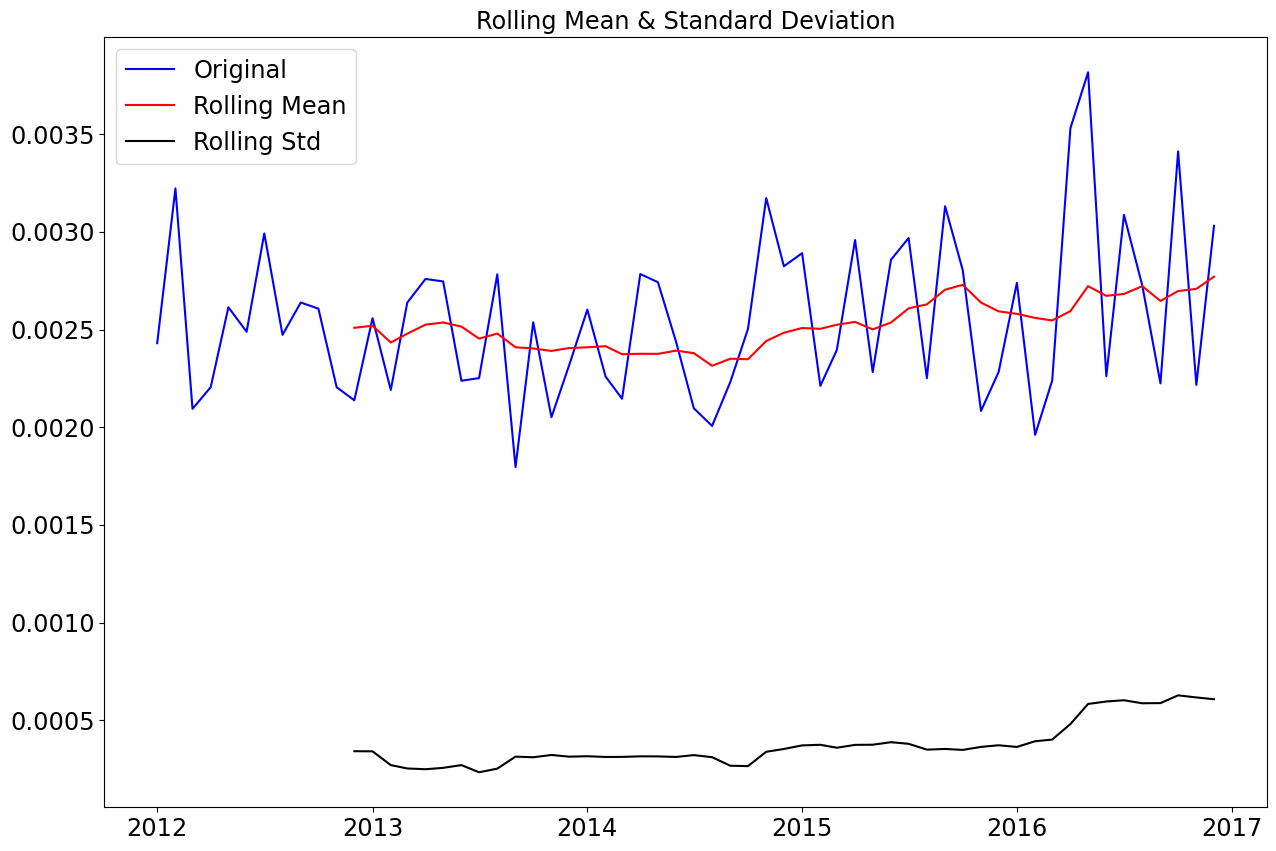

Results of Dickey-Fuller Test:
Test Statistic                -7.545782e+00
p-value                        3.286538e-11
#Lags Used                     0.000000e+00
Number of Observations Used    5.900000e+01
Critical Value (1%)           -3.546395e+00
Critical Value (5%)           -2.911939e+00
Critical Value (10%)          -2.593652e+00
dtype: float64
None




___________________________________________________________________________________________________________________________


							 Whse_J 



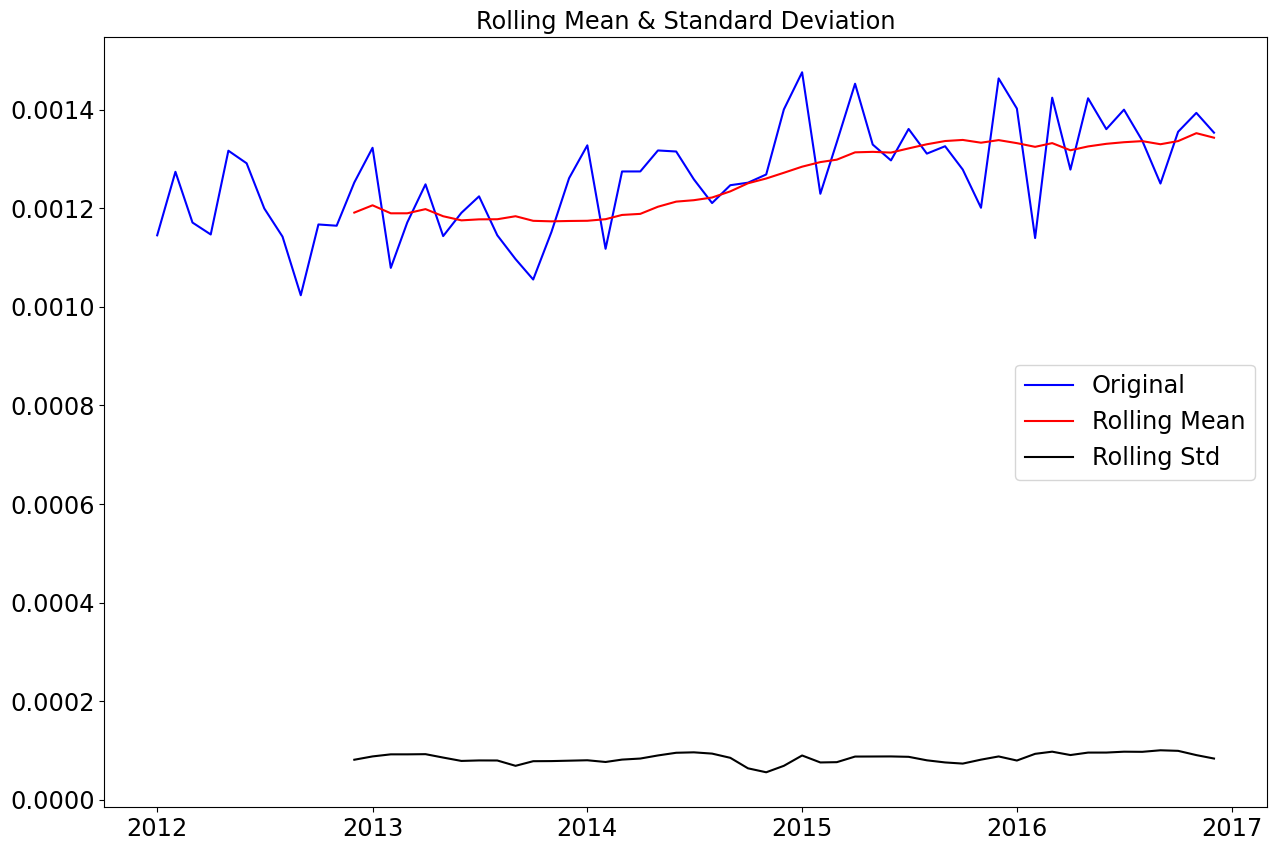

Results of Dickey-Fuller Test:
Test Statistic                 -1.246162
p-value                         0.653429
#Lags Used                      4.000000
Number of Observations Used    55.000000
Critical Value (1%)            -3.555273
Critical Value (5%)            -2.915731
Critical Value (10%)           -2.595670
dtype: float64
None




___________________________________________________________________________________________________________________________


							 Whse_A 



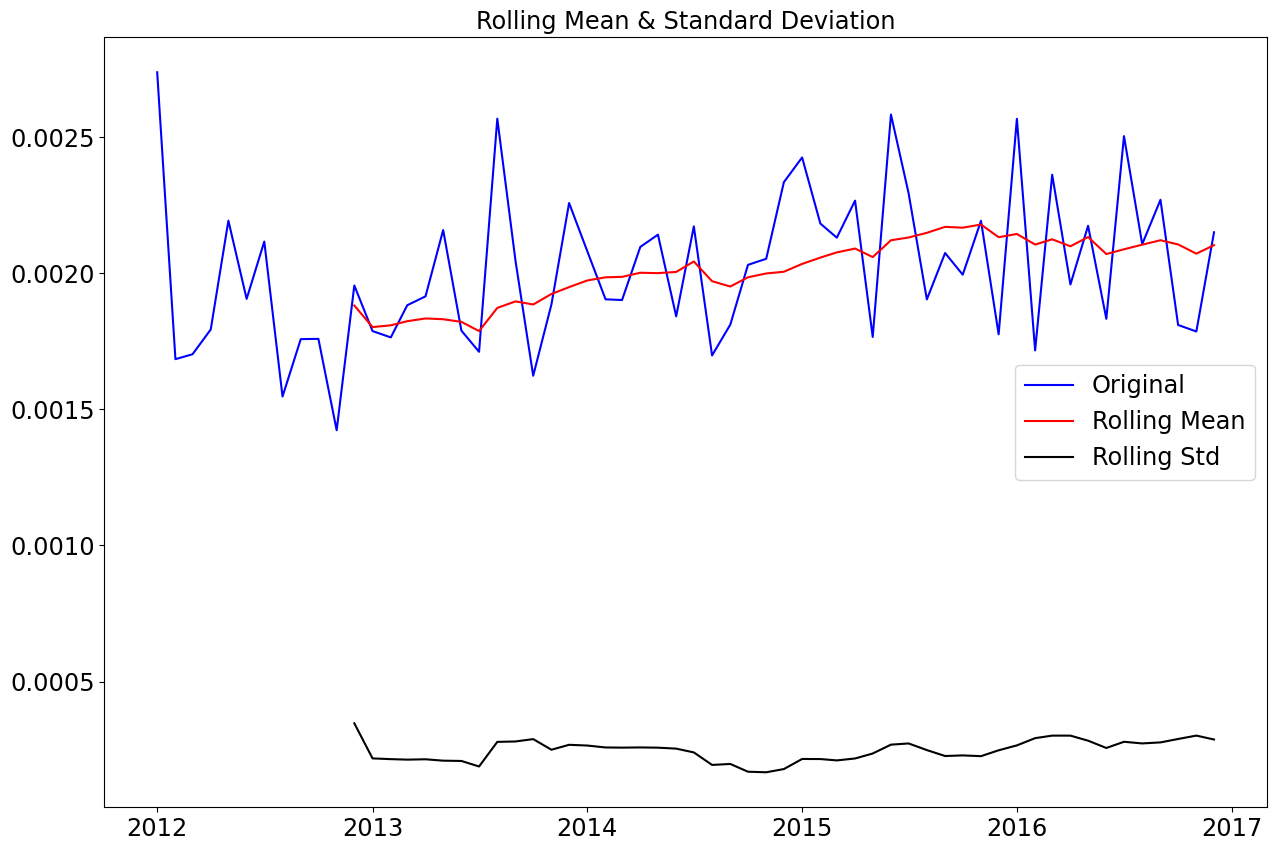

Results of Dickey-Fuller Test:
Test Statistic                -8.411181e+00
p-value                        2.101781e-13
#Lags Used                     0.000000e+00
Number of Observations Used    5.900000e+01
Critical Value (1%)           -3.546395e+00
Critical Value (5%)           -2.911939e+00
Critical Value (10%)          -2.593652e+00
dtype: float64
None




___________________________________________________________________________________________________________________________


							 Whse_C 



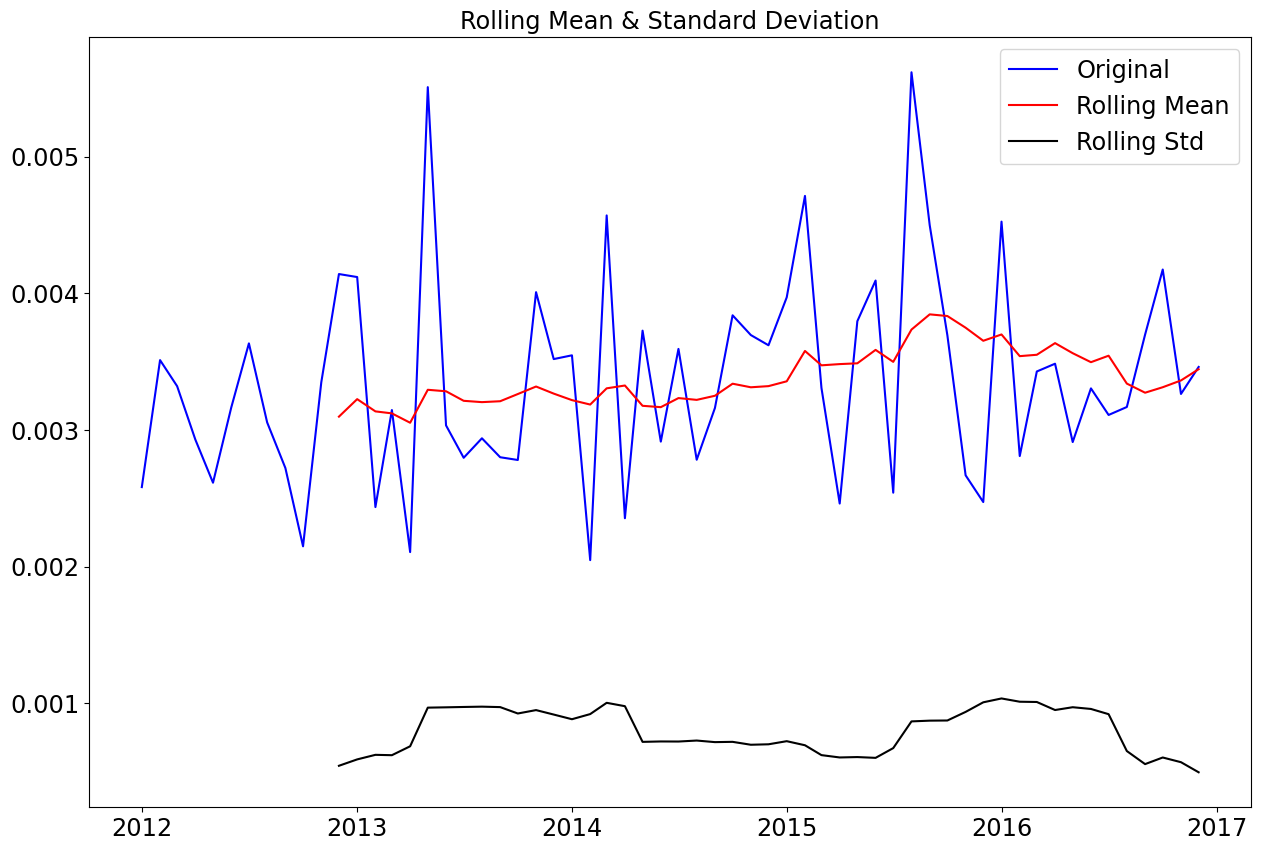

Results of Dickey-Fuller Test:
Test Statistic                -8.694233e+00
p-value                        3.964676e-14
#Lags Used                     0.000000e+00
Number of Observations Used    5.900000e+01
Critical Value (1%)           -3.546395e+00
Critical Value (5%)           -2.911939e+00
Critical Value (10%)          -2.593652e+00
dtype: float64
None


In [21]:
class color:
        BOLD = '\033[1m'
        UNDERLINE = '\033[4m'
        END = '\033[0m'
for i in range(0,len(Warehouse)):
    print(('\n\n\n\n___________________________________________________________________________________________________________________________'
          ))
    print(color.BOLD  + f"\n\n\t\t\t\t\t\t\t {Warehouse[i]} \n" + color.END)
    print(test_stationarity(diff_warehouse(Warehouse[i]).Order_Demand))






___________________________________________________________________________________________________________________________


							 Whse_S 



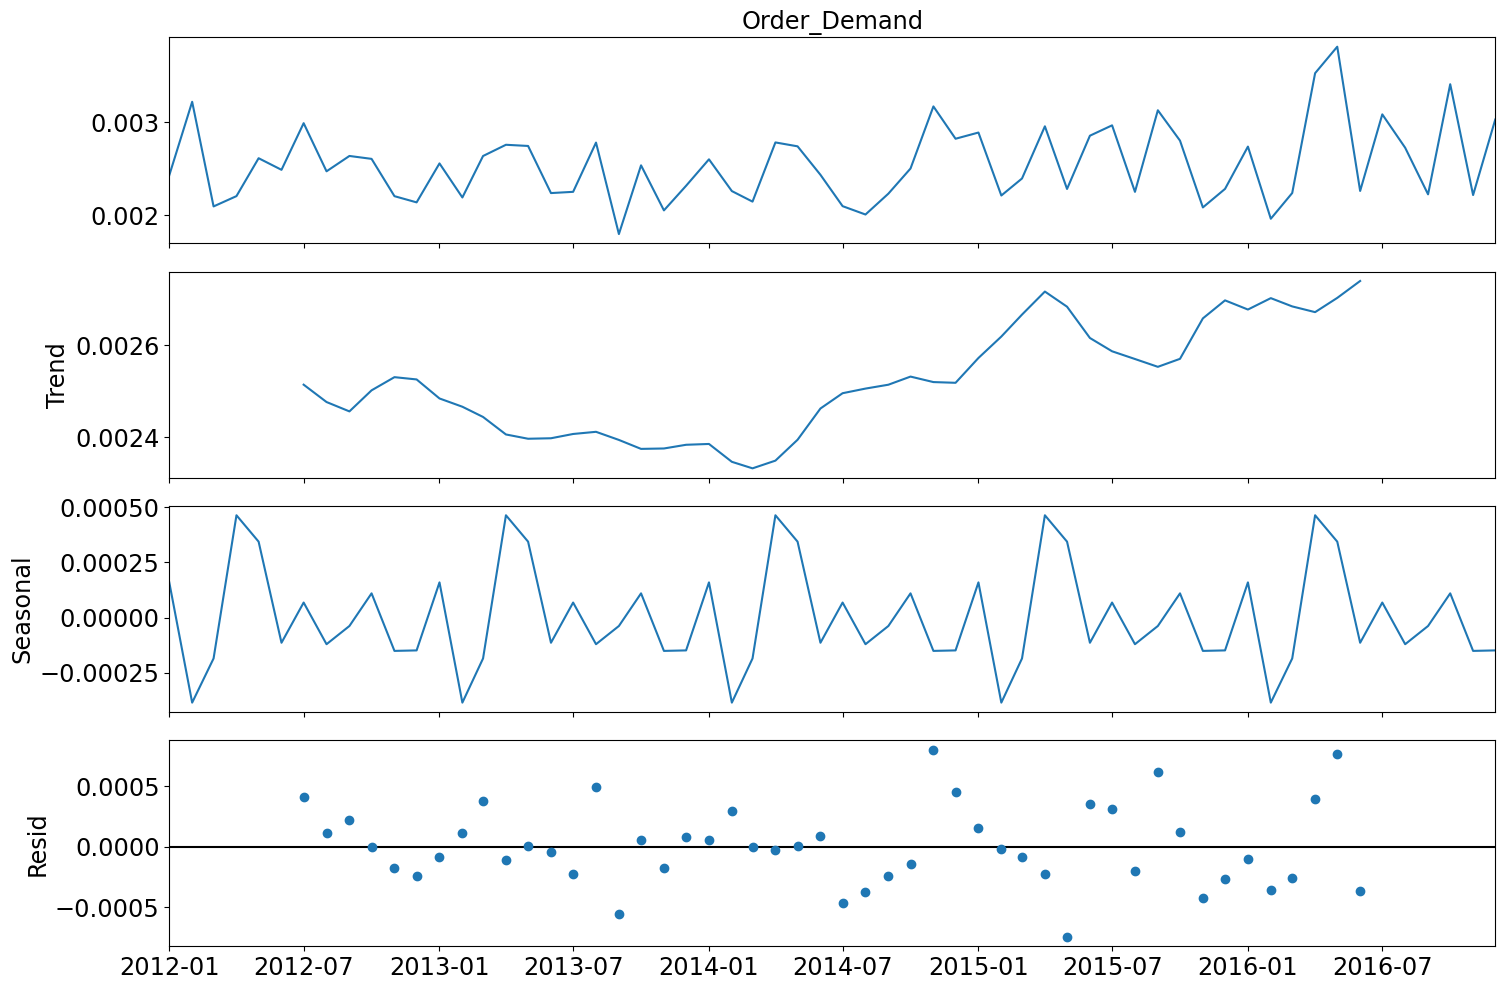





___________________________________________________________________________________________________________________________


							 Whse_J 



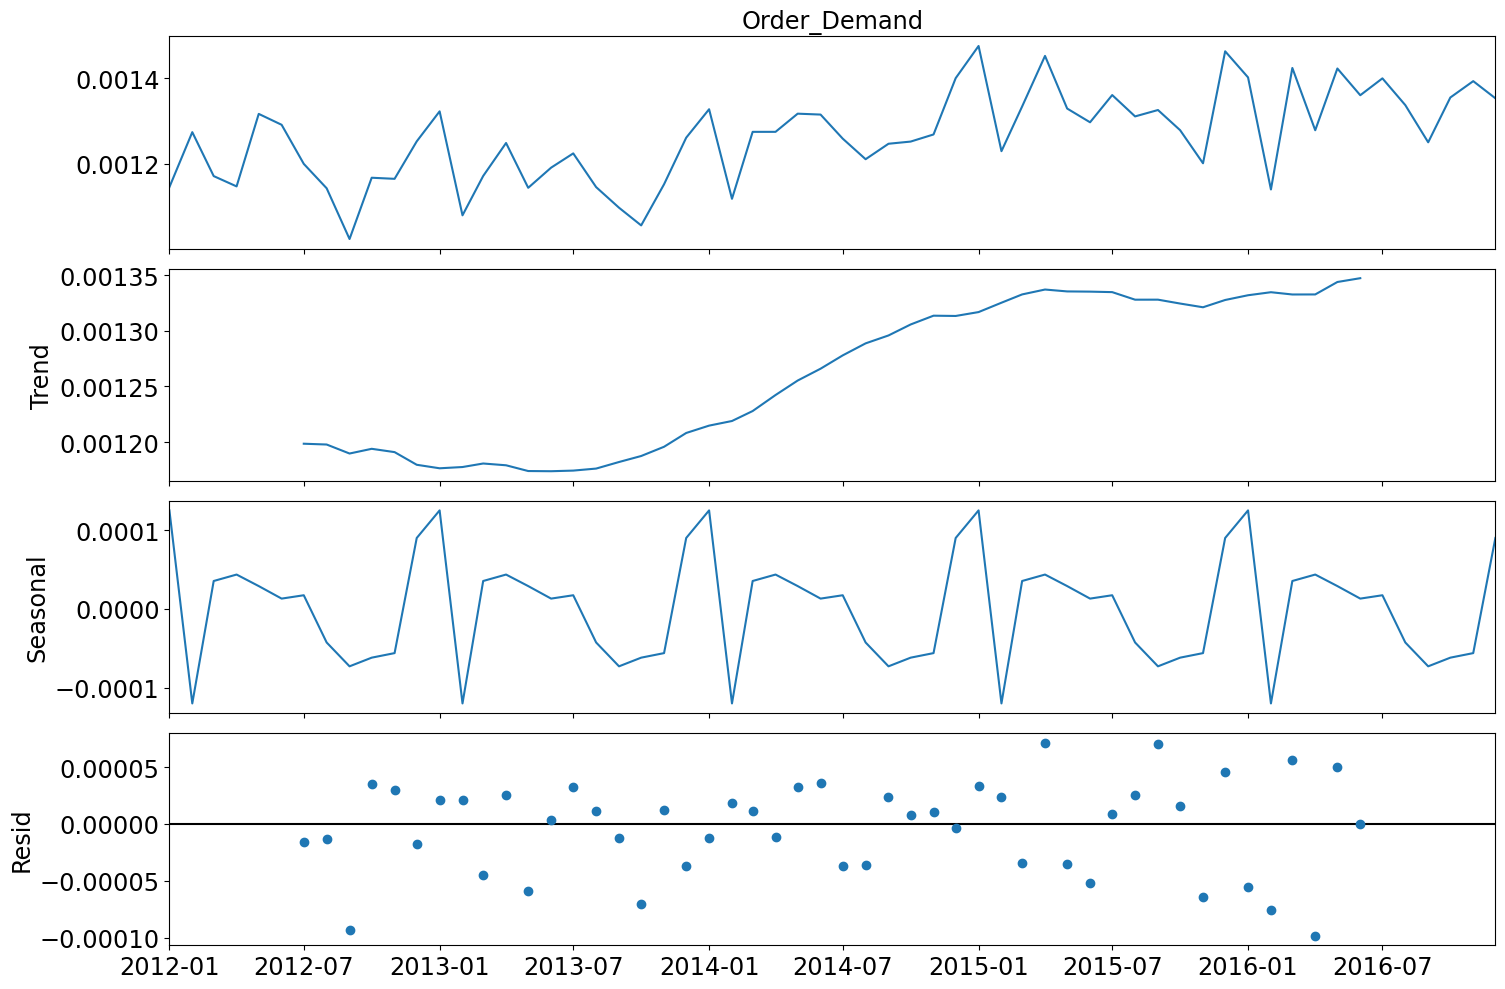





___________________________________________________________________________________________________________________________


							 Whse_A 



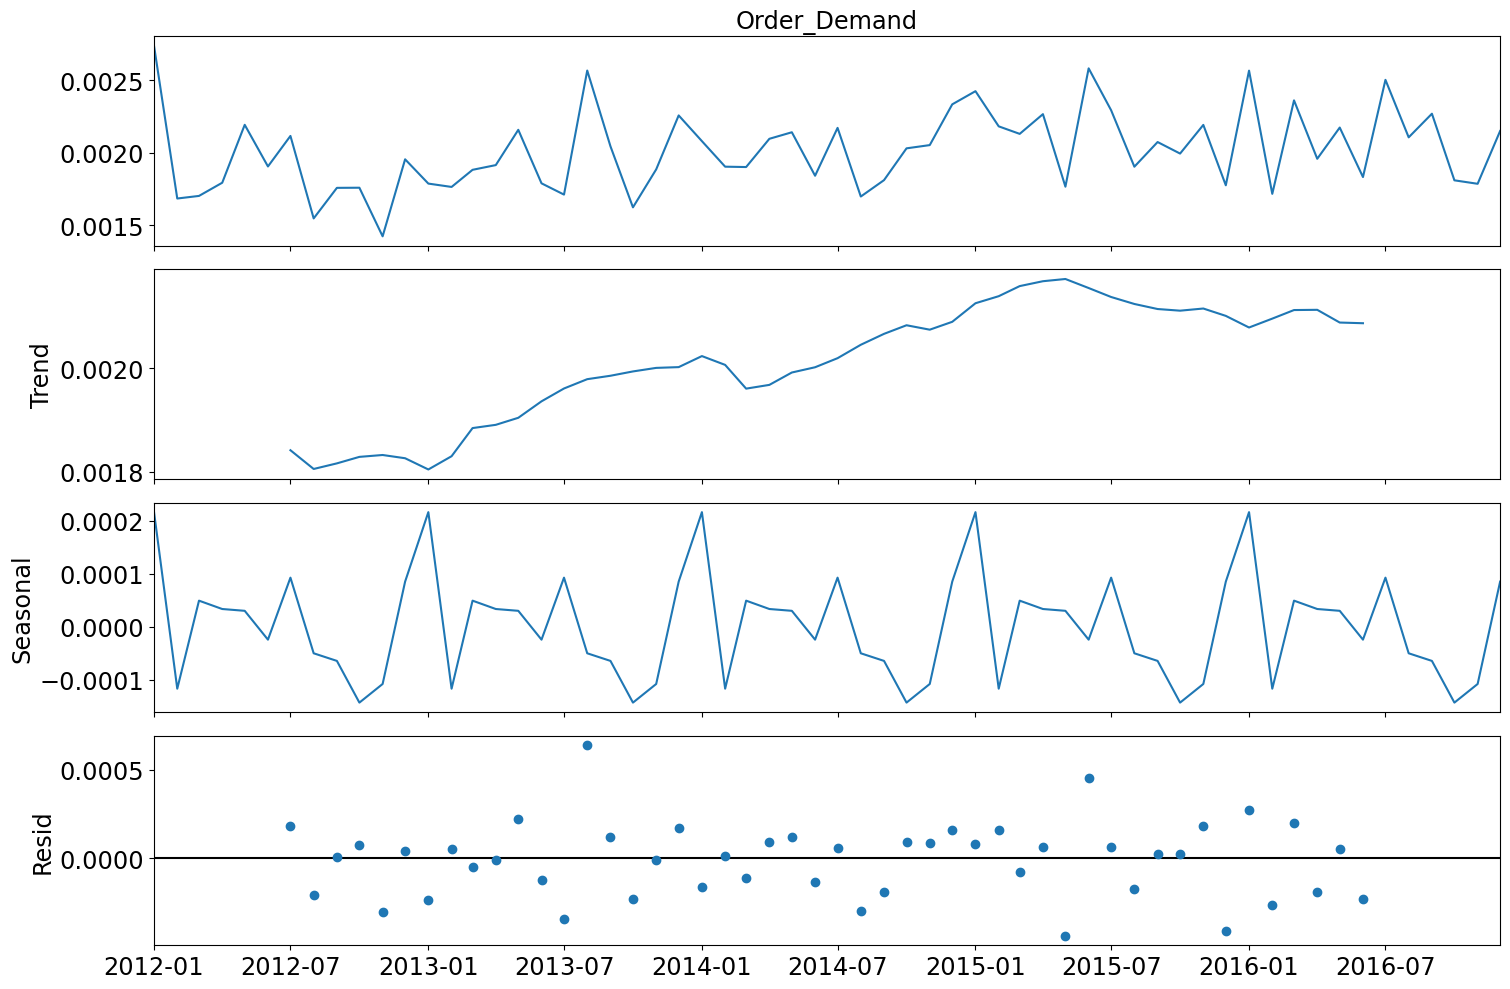





___________________________________________________________________________________________________________________________


							 Whse_C 



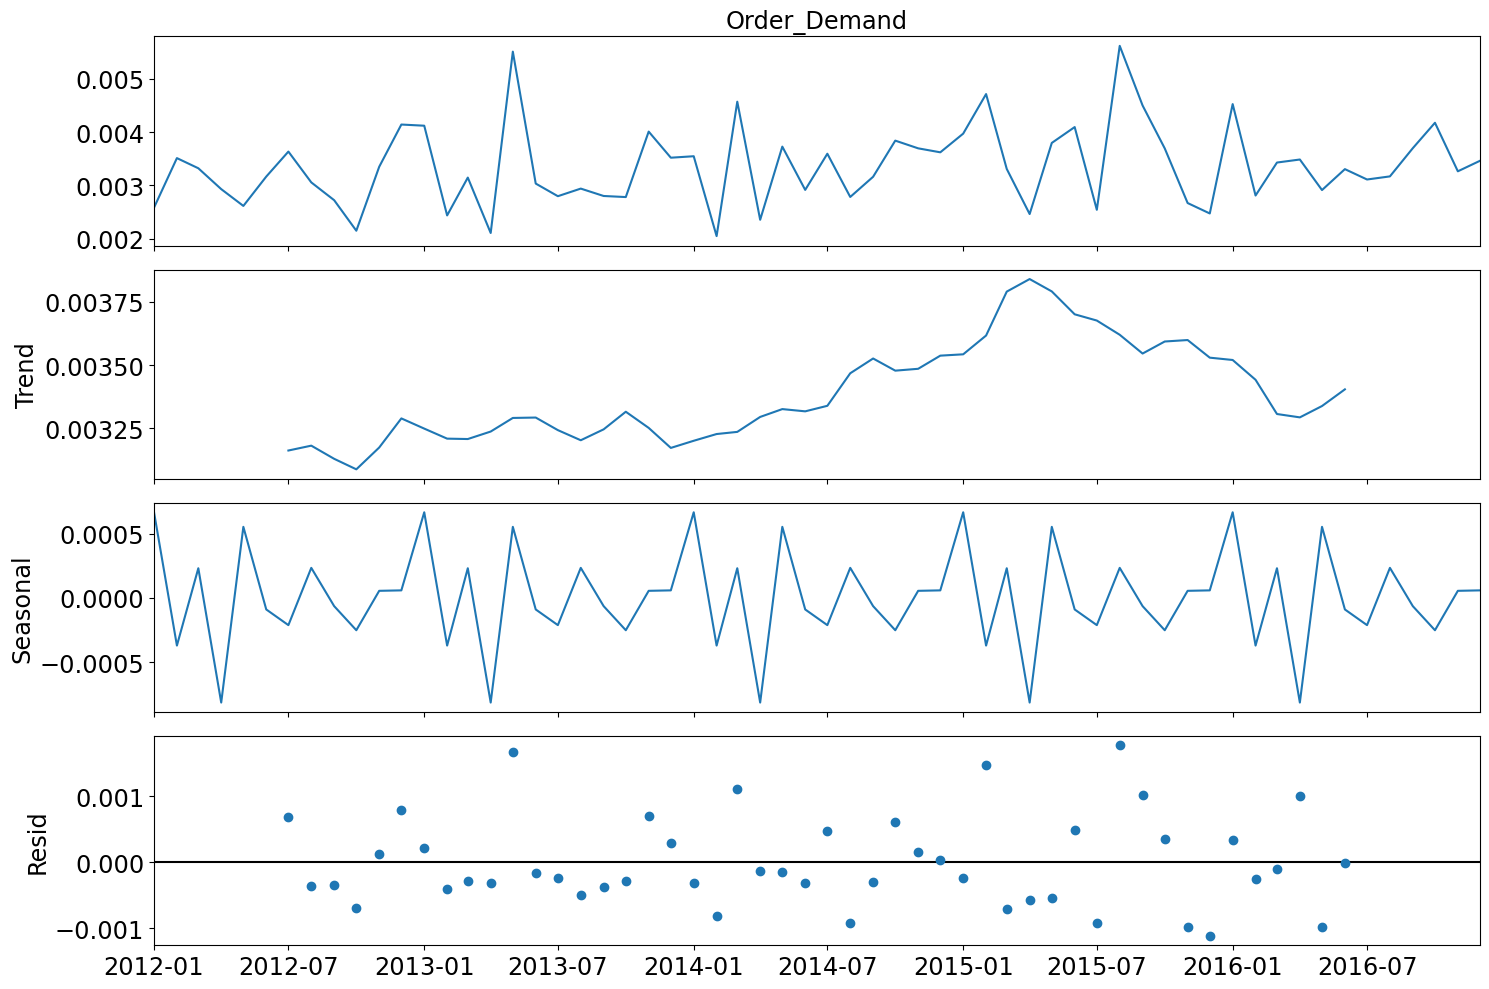

In [22]:
for i in range(0,len(Warehouse)):
    decomp = sm.tsa.seasonal_decompose(diff_warehouse(Warehouse[i]).Order_Demand, period=12)
    plt.show()
    print(('\n\n\n\n___________________________________________________________________________________________________________________________'
          ))
    print(color.BOLD  + f"\n\n\t\t\t\t\t\t\t {Warehouse[i]} \n" + color.END)
    decomp.plot()


# `for` loop for creating ACF and PACF plots





___________________________________________________________________________________________________________________________


							 Whse_S 



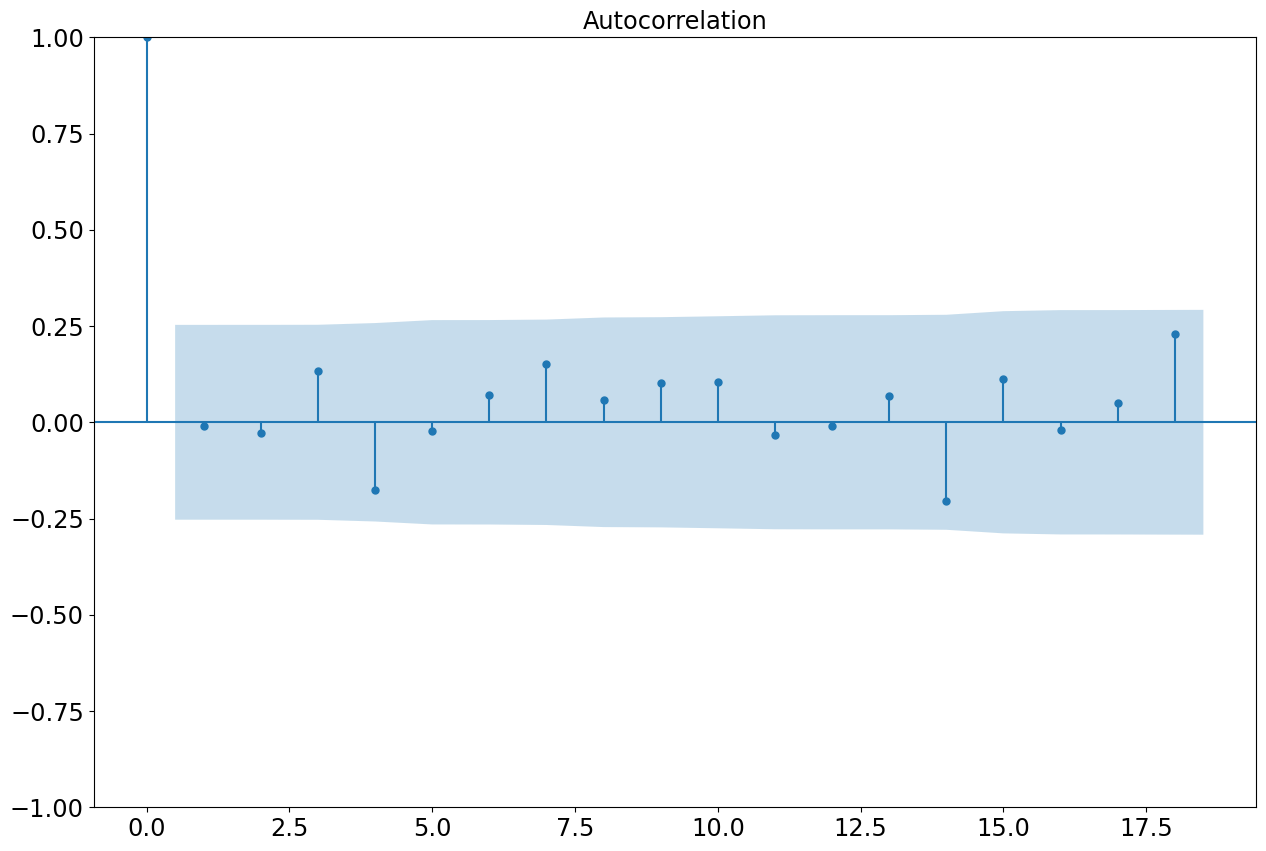

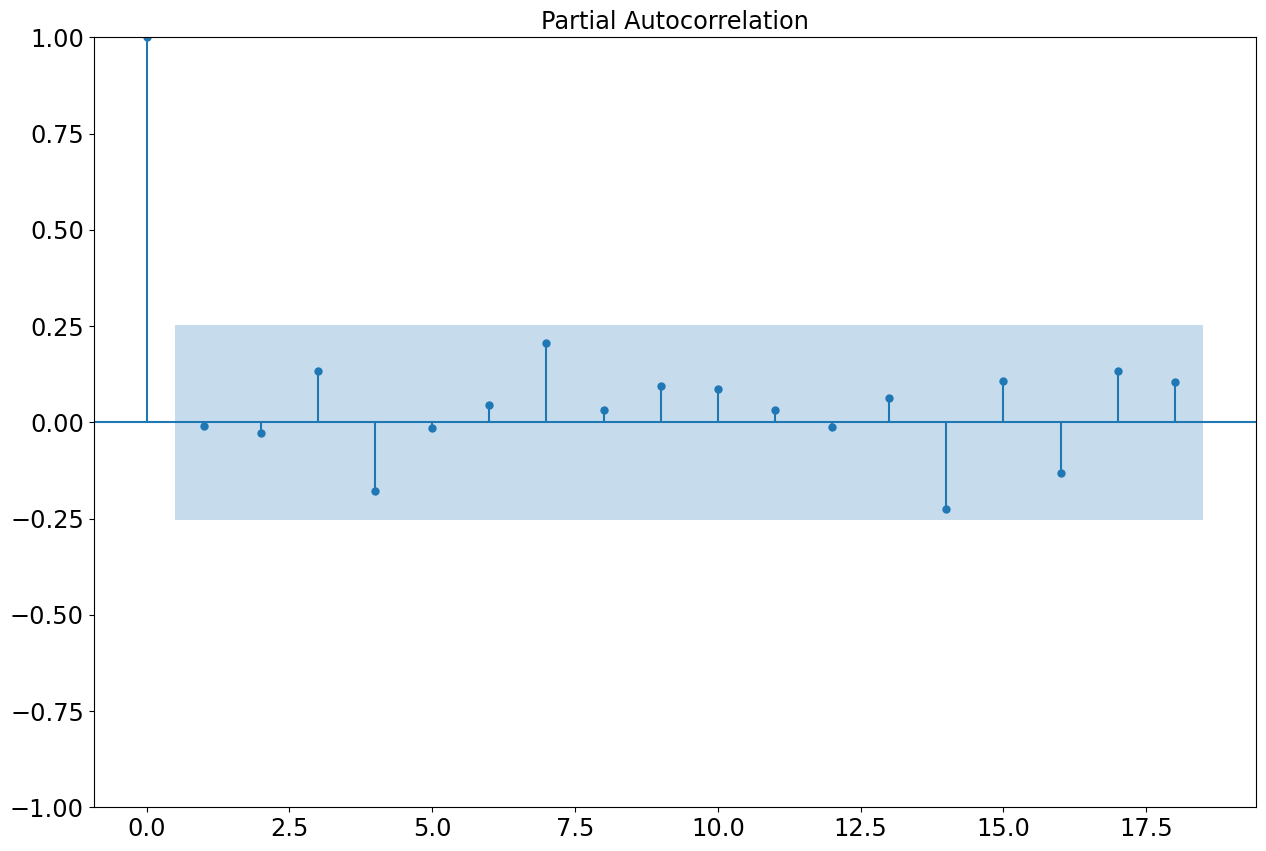





___________________________________________________________________________________________________________________________


							 Whse_J 



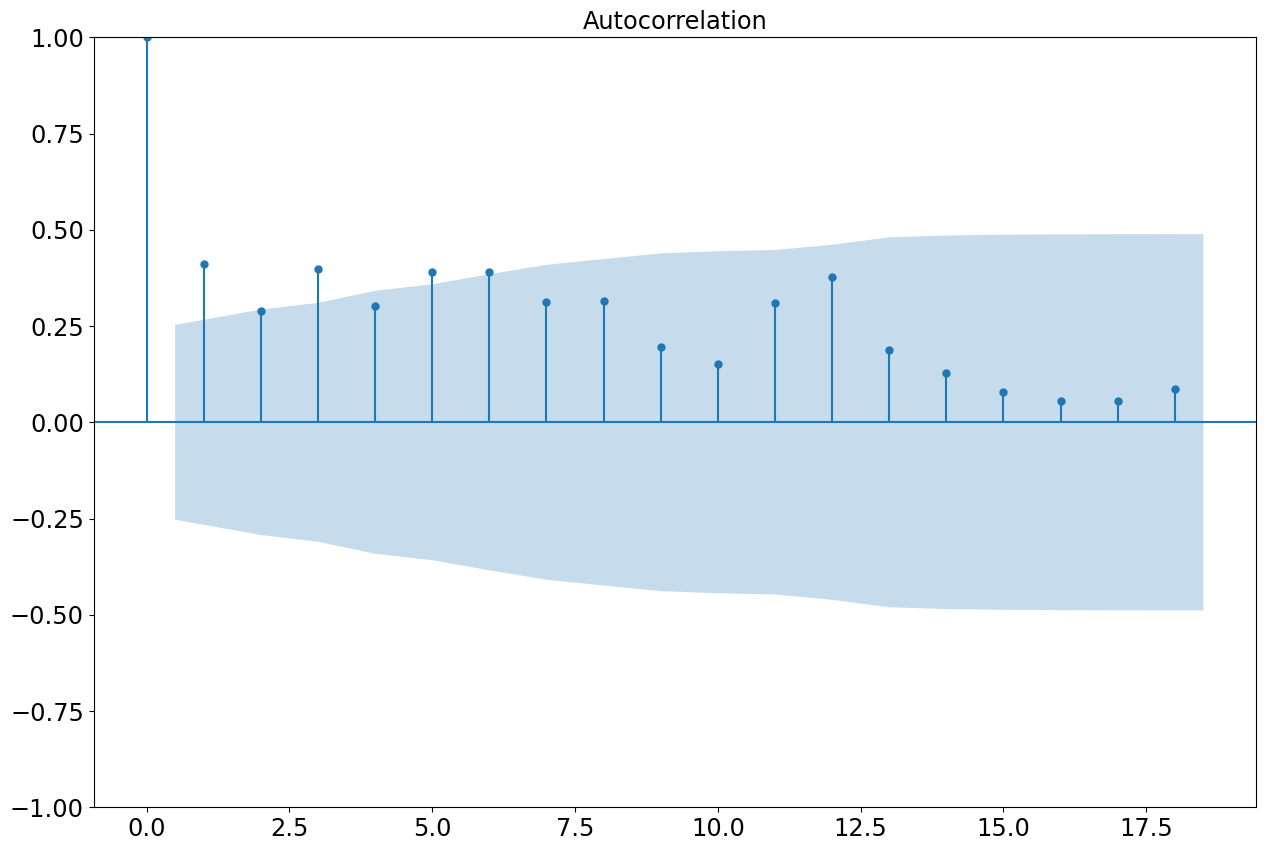

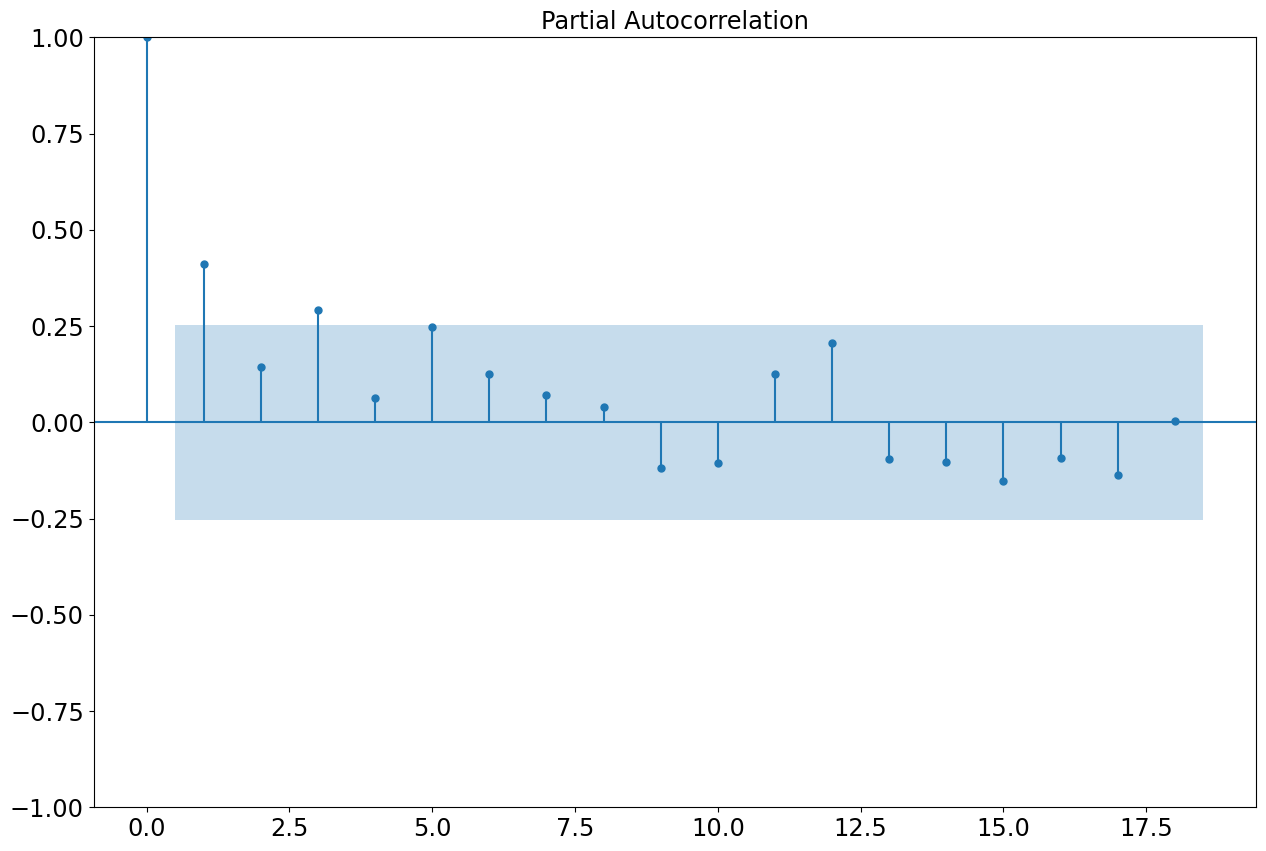





___________________________________________________________________________________________________________________________


							 Whse_A 



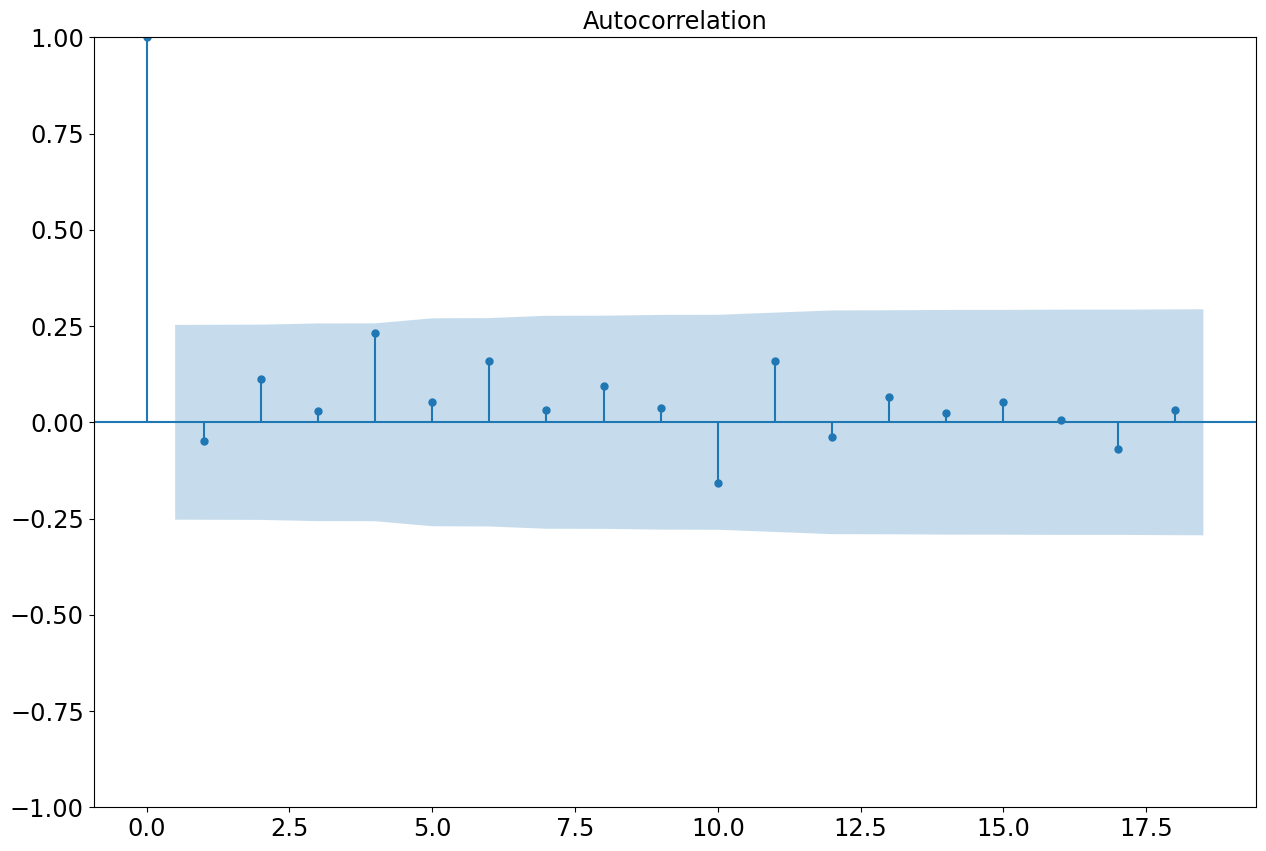

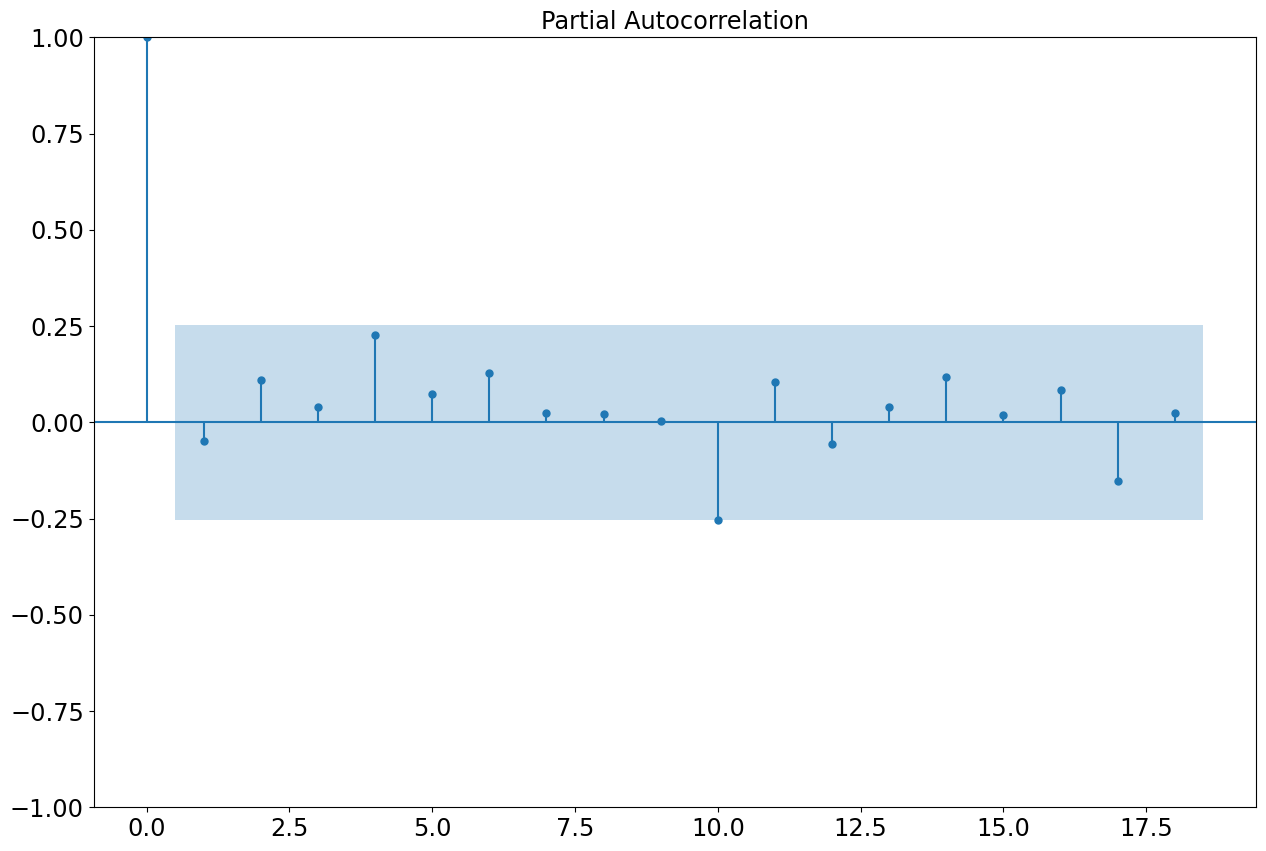





___________________________________________________________________________________________________________________________


							 Whse_C 



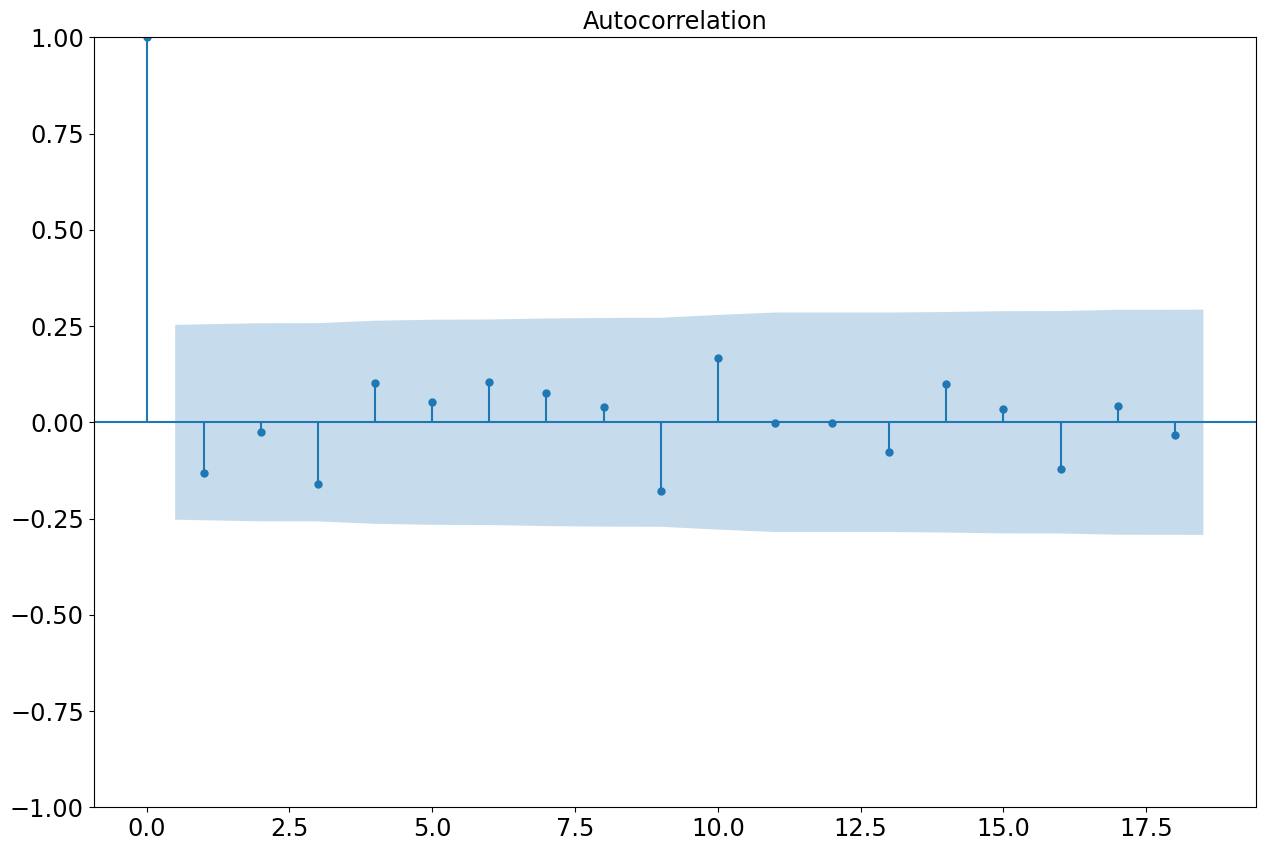

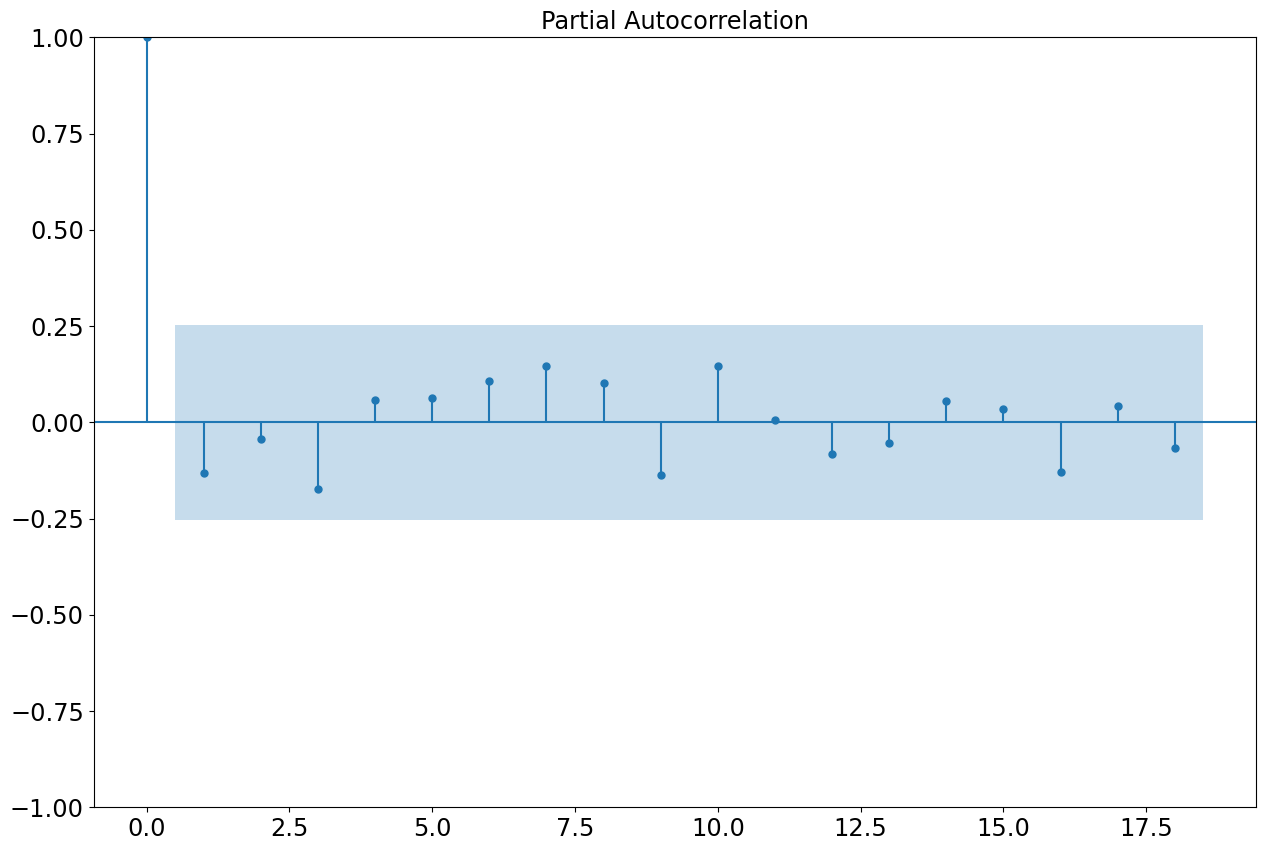

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

for i in range(0,len(Warehouse)):
    plot_acf(diff_warehouse(Warehouse[i]).Order_Demand)
    print(('\n\n\n\n___________________________________________________________________________________________________________________________'
          ))
    print(color.BOLD  + f"\n\n\t\t\t\t\t\t\t {Warehouse[i]} \n" + color.END)
    plt.show()
    plot_pacf(diff_warehouse(Warehouse[i]).Order_Demand)
    plt.show()

# Method 2 - Auto Arima

In [25]:
import pandas as pd
!pip install pmdarima
from pmdarima.arima import auto_arima
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load your data
DataFrame = pd.read_csv('Historical Product Demand.csv')  # Adjust the file path as needed

# Convert 'Date' column to datetime if it's not already
DataFrame['Date'] = pd.to_datetime(DataFrame['Date'], dayfirst=True)

# Define the diff_warehouse function
def diff_warehouse(Whse_A):
    WH_A = DataFrame[DataFrame['Warehouse'] == Whse_A].copy()
    WH_A['Order_Demand'] = (WH_A['Order_Demand'] - WH_A['Order_Demand'].min()) / (WH_A['Order_Demand'].max() - WH_A['Order_Demand'].min())
    WH_A = WH_A.sort_values('Date')
    WH_A_ALLYEARS = WH_A.groupby(WH_A['Date'].dt.to_period('M'))['Order_Demand'].mean().reset_index()
    WH_A_ALLYEARS['Date'] = WH_A_ALLYEARS['Date'].dt.to_timestamp()
    WH_A_ALLYEARS = WH_A_ALLYEARS.set_index('Date')
    WH_A_ALLYEARS['MA_3'] = WH_A_ALLYEARS['Order_Demand'].rolling(3).mean()
    WH_A_ALLYEARS['MA_3_std'] = WH_A_ALLYEARS['Order_Demand'].rolling(3).std()
    return WH_A_ALLYEARS

# Define color class
class color:
    BOLD = '\033[1m'
    END = '\033[0m'

# Define Warehouse variable
Warehouse = DataFrame['Warehouse'].unique()

for i in range(0, len(Warehouse)):
    data = diff_warehouse(Warehouse[i])
    train = data.iloc[:int(len(data)*0.7)]
    test = data.iloc[int(len(data)*0.7):]

    print('\n\n\n\n' + '_'*120)
    print(color.BOLD + f"\n\n\t\t\t\t\t\t\t {Warehouse[i]} \n" + color.END)

    # Adjust the maximum p and q values based on the length of your data
    max_p = min(3, len(train) // 10)
    max_q = min(3, len(train) // 10)

    stepwise_model = auto_arima(train['Order_Demand'], start_p=1, start_q=1, max_p=max_p, max_q=max_q, m=12,
                                start_P=0, seasonal=True, d=1, D=1, trace=True,
                                error_action='ignore', suppress_warnings=True, stepwise=True)

    order_in = stepwise_model.order
    seasonal_order_in = stepwise_model.seasonal_order
    print('Least AIC ', stepwise_model.aic())
    print('Least BIC ', stepwise_model.bic())

    mod = sm.tsa.statespace.SARIMAX(train['Order_Demand'], trend='n', order=order_in, seasonal_order=seasonal_order_in, enforce_invertibility=False)
    results = mod.fit()
    print('\n\n\n', results.summary())

    # Comment out diagnostics plot for now
    # print('\n\n\n\t\t\t\t\t\t Plotting Diagnostics')
    # try:
    #     results.plot_diagnostics(figsize=(20, 14))
    #     plt.show()
    # except ValueError as e:
    #     print(f"Unable to plot diagnostics: {e}")

    print('\n\n\n\t\t\t\t\t\t Forecasting using trained model - 70% Data ')
    prediction_1 = results.get_forecast(steps=len(test))
    prediction_1_ci = prediction_1.conf_int()
    pred = prediction_1.predicted_mean

    print('\n\n\n\t\t\t\t\t\t Dataframe of Forecasting ')
    Prediction_df = pd.DataFrame(pred, columns=['ORDER_DEMAND_FORECAST'])
    print(Prediction_df)

    Given = go.Scatter(x=data.index, y=data['Order_Demand'], mode='lines+markers', name=f'Order_Demand {Warehouse[i]}')
    Predicted = go.Scatter(x=Prediction_df.index, y=Prediction_df['ORDER_DEMAND_FORECAST'], mode='lines+markers', name=f'Predicted_Order_Demand {Warehouse[i]}')
    Final_Visu = [Given, Predicted]
    layout = go.Layout(
        title=f'Forecasted Order Demand for {Warehouse[i]}',
        xaxis=dict(title='Years', titlefont=dict(family='Courier New, monospace', size=18, color='#7f7f7f')),
        yaxis=dict(title='Order Demand', titlefont=dict(family='Courier New, monospace', size=18, color='#7f7f7f'))
    )
    Visu = go.Figure(data=Final_Visu, layout=layout)
    plot(Visu, filename=f'forecast_{Warehouse[i]}.html')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.1 MB/s eta 0:00:00




________________________________________________________________________________________________________________________


							 Whse_A 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-365.217, Time=2.67 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-363.035, Time=0.19 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-362.438, Time=2.47 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-366.713, Time=0.85 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-368.715, Time=0.20 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-368.787, Time=0.41 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-366.442, Time=0.88 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-364.711, Time=0.43 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AIC=-362.713, Time=3.63 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-363.554, Time=2.68 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=-367.301, Time=2.83 sec


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a su




                                       SARIMAX Results                                      
Dep. Variable:                        Order_Demand   No. Observations:                   45
Model:             SARIMAX(0, 1, 1)x(1, 1, [], 12)   Log Likelihood                 187.393
Date:                             Sat, 07 Sep 2024   AIC                           -368.787
Time:                                     15:31:53   BIC                           -364.390
Sample:                                          0   HQIC                          -367.329
                                              - 45                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4790      0.260     -1.843      0.065      -0.988       0.030
ar.S.L12      -0.2405  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.






                                      SARIMAX Results                                      
Dep. Variable:                       Order_Demand   No. Observations:                   46
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 162.198
Date:                            Sat, 07 Sep 2024   AIC                           -322.396
Time:                                    15:31:57   BIC                           -320.899
Sample:                                         0   HQIC                          -321.892
                                             - 46                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.144e-06   2.02e-07     15.556      0.000    2.75e-06    3.54e-06
Ljung-Box (L1) (Q):            

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.






                                       SARIMAX Results                                      
Dep. Variable:                        Order_Demand   No. Observations:                   44
Model:             SARIMAX(0, 1, 2)x(0, 1, [], 12)   Log Likelihood                 158.815
Date:                             Sat, 07 Sep 2024   AIC                           -311.630
Time:                                     15:32:11   BIC                           -307.328
Sample:                                          0   HQIC                          -310.228
                                              - 44                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6877      0.328     -2.097      0.036      -1.331      -0.045
ma.L2          0.0165  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.







________________________________________________________________________________________________________________________


							 Whse_C 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-275.659, Time=0.59 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-284.783, Time=0.12 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-285.341, Time=0.44 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-294.546, Time=0.61 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-296.545, Time=0.23 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-296.277, Time=0.44 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-292.546, Time=0.89 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-277.659, Time=0.35 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=-280.784, Time=0.58 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-285.383, Time=0.17 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=-285.406, Time=0.86 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=-295.091, Time=0.97 sec

Best mod

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.






                                       SARIMAX Results                                      
Dep. Variable:                        Order_Demand   No. Observations:                   44
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                 150.467
Date:                             Sat, 07 Sep 2024   AIC                           -296.935
Time:                                     15:32:19   BIC                           -294.067
Sample:                                 11-01-2011   HQIC                          -296.000
                                      - 06-01-2015                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8301      0.274     -3.031      0.002      -1.367      -0.293
sigma2       3.42e-06  

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [26]:
a = diff_warehouse(Warehouse[1])
print(a)

            Order_Demand      MA_3  MA_3_std
Date                                        
2011-06-01      0.010663       NaN       NaN
2011-09-01      0.000570       NaN       NaN
2011-10-01      0.000031  0.003755  0.005989
2011-11-01      0.000888  0.000496  0.000433
2011-12-01      0.002215  0.001045  0.001100
...                  ...       ...       ...
2016-09-01      0.001250  0.001329  0.000075
2016-10-01      0.001355  0.001314  0.000056
2016-11-01      0.001393  0.001333  0.000074
2016-12-01      0.001353  0.001367  0.000023
2017-01-01      0.001470  0.001405  0.000059

[66 rows x 3 columns]


In [27]:
a['DIFFERENCING']=diff_warehouse(Warehouse[1])['Order_Demand'].diff(periods=1)
a['DIFFERENCING'].head()
len(a)
a

,Order_Demand,MA_3,MA_3_std,DIFFERENCING
Date,,,,
2011-06-01,0.010663,NaN,NaN,NaN
2011-09-01,0.000570,NaN,NaN,-0.010093
2011-10-01,0.000031,0.003755,0.005989,-0.000539
2011-11-01,0.000888,0.000496,0.000433,0.000856
2011-12-01,0.002215,0.001045,0.001100,0.001328
...,...,...,...,...
2016-09-01,0.001250,0.001329,0.000075,-0.000087
2016-10-01,0.001355,0.001314,0.000056,0.000105
2016-11-01,0.001393,0.001333,0.000074,0.000038


# Dividing the data into testing data and training data

Initial 'a' data:
            Order_Demand      MA_3  MA_3_std  DIFFERENCING
Date                                                      
2011-06-01      0.010663       NaN       NaN           NaN
2011-09-01      0.000570       NaN       NaN     -0.010093
2011-10-01      0.000031  0.003755  0.005989     -0.000539
2011-11-01      0.000888  0.000496  0.000433      0.000856
2011-12-01      0.002215  0.001045  0.001100      0.001328
Length of 'a': 66
Initial 'train1' data:
            Order_Demand      MA_3  MA_3_std  DIFFERENCING
Date                                                      
2011-06-01      0.010663       NaN       NaN           NaN
2011-09-01      0.000570       NaN       NaN     -0.010093
2011-10-01      0.000031  0.003755  0.005989     -0.000539
2011-11-01      0.000888  0.000496  0.000433      0.000856
2011-12-01      0.002215  0.001045  0.001100      0.001328
Length of 'train1': 40
Differenced series data:
Date
2011-09-01   -0.010093
2011-10-01   -0.000539
2011-11-01    0.

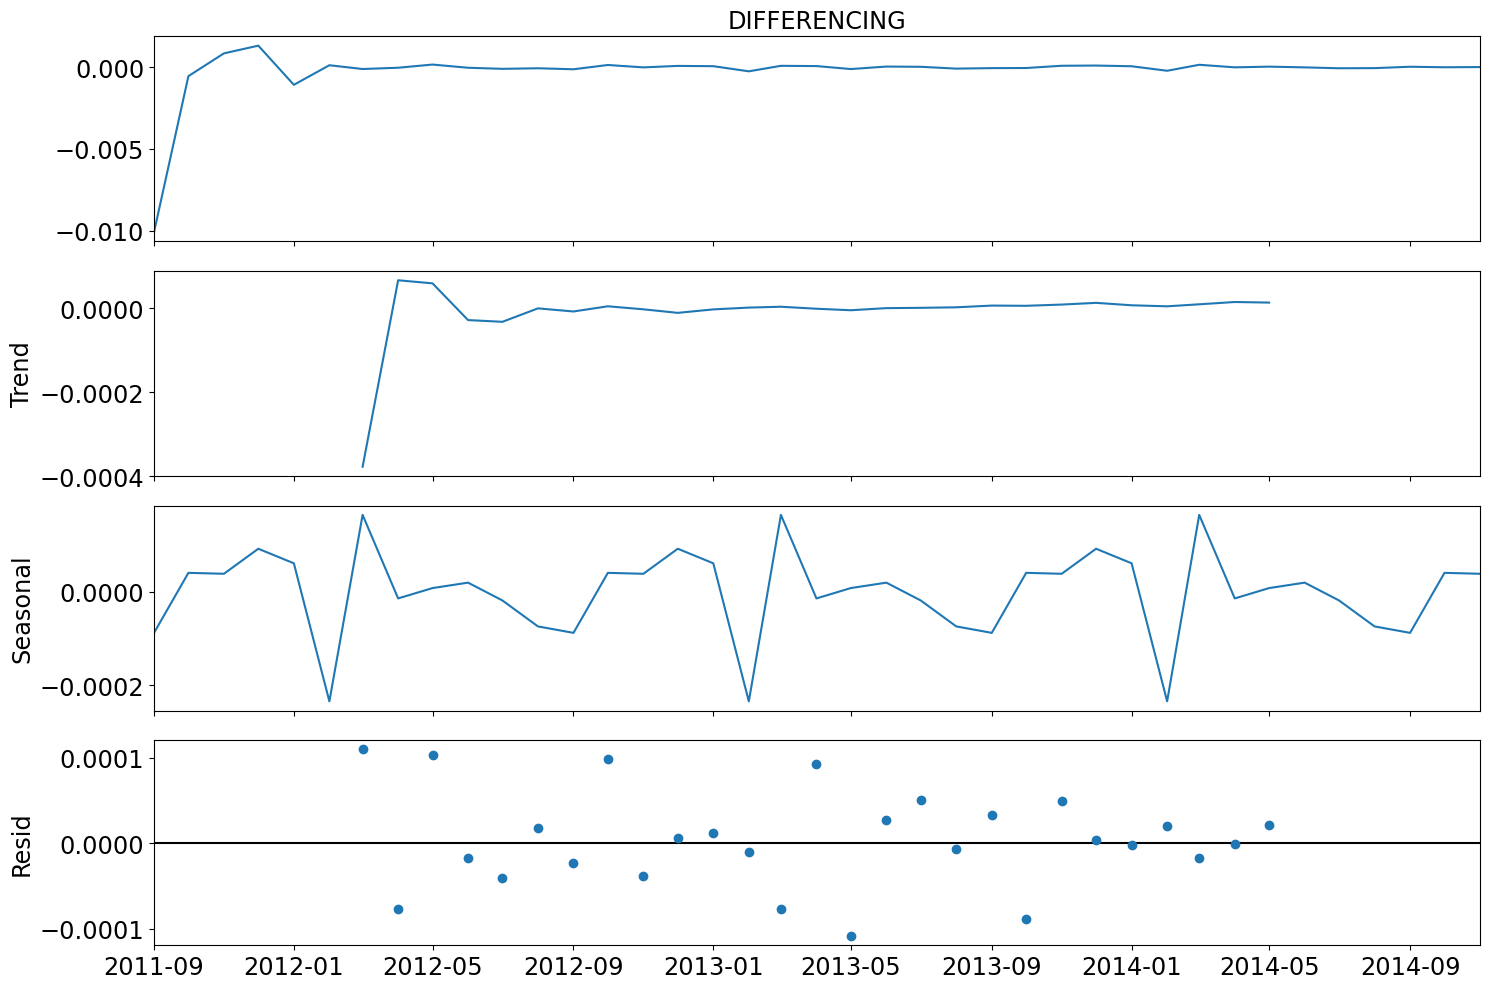

In [28]:
# Ensure 'a' has data
print("Initial 'a' data:")
print(a.head())
print(f"Length of 'a': {len(a)}")

# Create 'train1' from 'a'
train1 = a.iloc[0:40]  # Adjust this slicing as needed
print("Initial 'train1' data:")
print(train1.head())
print(f"Length of 'train1': {len(train1)}")

# Perform differencing using .loc to avoid SettingWithCopyWarning
train1.loc[:, 'DIFFERENCING'] = train1['Order_Demand'].diff(periods=1)

# Check the differenced series
differenced_series = train1['DIFFERENCING'].dropna()
print("Differenced series data:")
print(differenced_series.head())
print(f"Length of differenced series: {len(differenced_series)}")

# Ensure there are at least 24 observations
if len(differenced_series) >= 24:
    decomp = sm.tsa.seasonal_decompose(differenced_series, period=12)
    decomp.plot()
    plt.show()
else:
    print("Not enough observations for seasonal decomposition. Need at least 24 observations.")


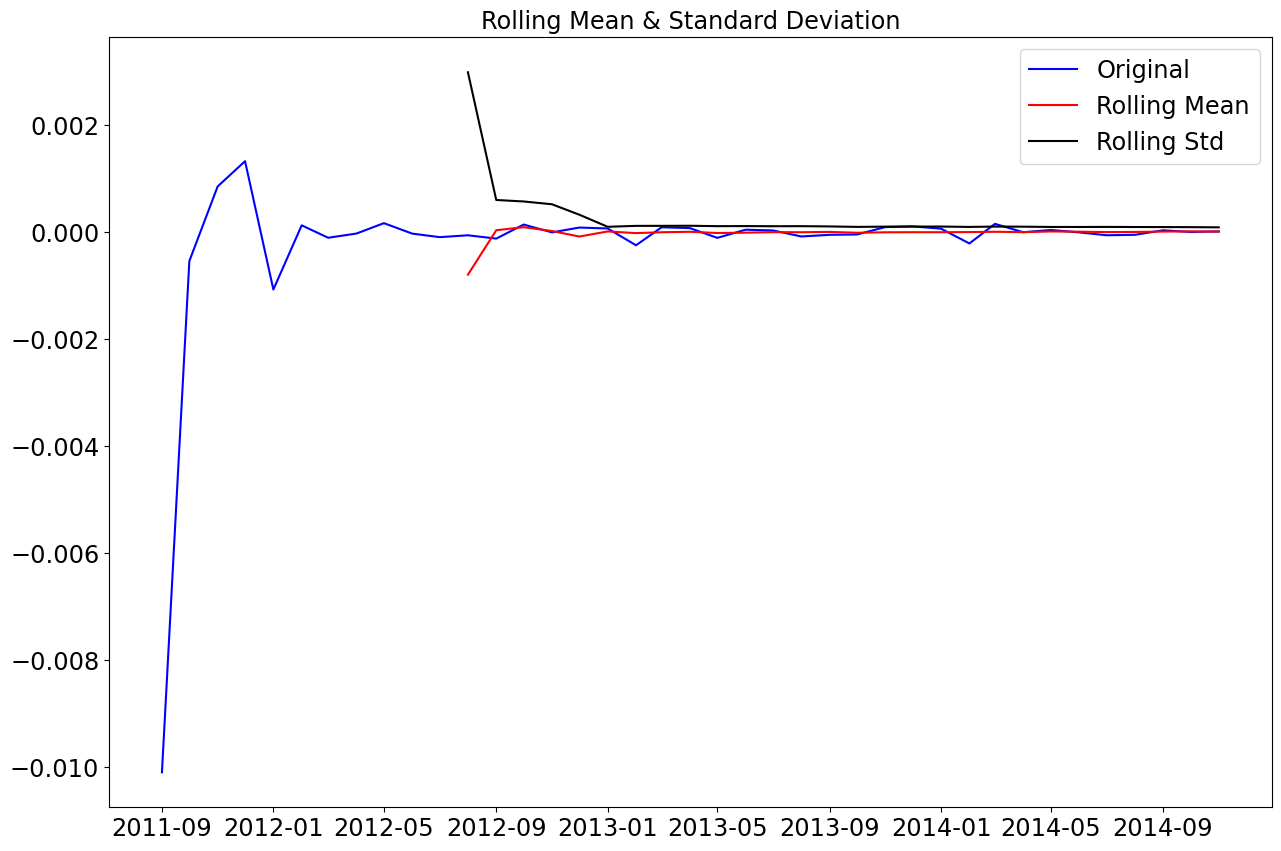

Results of Dickey-Fuller Test:
Test Statistic                 -4.836172
p-value                         0.000046
#Lags Used                      3.000000
Number of Observations Used    35.000000
Critical Value (1%)            -3.632743
Critical Value (5%)            -2.948510
Critical Value (10%)           -2.613017
dtype: float64


In [29]:
def test_stationarity(timeseries):
    # Determining rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Ensure the function is defined before this call
test_stationarity(train1.DIFFERENCING.dropna(inplace=False))

In [30]:
train1.reset_index(inplace=True)
train1['Month'] = train1['Date']  # Assuming 'Date' is the name of your datetime index column

# Convert 'Month' to datetime and set it as the index
train1['Month'] = pd.to_datetime(train1['Month'])
train1 = train1.set_index('Month')

# Drop NA values from the DIFFERENCING column
train1['DIFFERENCING'].dropna(inplace=True)

# Print the DataFrame to verify the changes
print(train1.head())
print(train1.columns)


                 Date  Order_Demand      MA_3  MA_3_std  DIFFERENCING
Month                                                                
2011-06-01 2011-06-01      0.010663       NaN       NaN           NaN
2011-09-01 2011-09-01      0.000570       NaN       NaN     -0.010093
2011-10-01 2011-10-01      0.000031  0.003755  0.005989     -0.000539
2011-11-01 2011-11-01      0.000888  0.000496  0.000433      0.000856
2011-12-01 2011-12-01      0.002215  0.001045  0.001100      0.001328
Index(['Date', 'Order_Demand', 'MA_3', 'MA_3_std', 'DIFFERENCING'], dtype='object')


<ipython-input-30-238ecf365213>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-238ecf365213>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Length of differenced series: 39


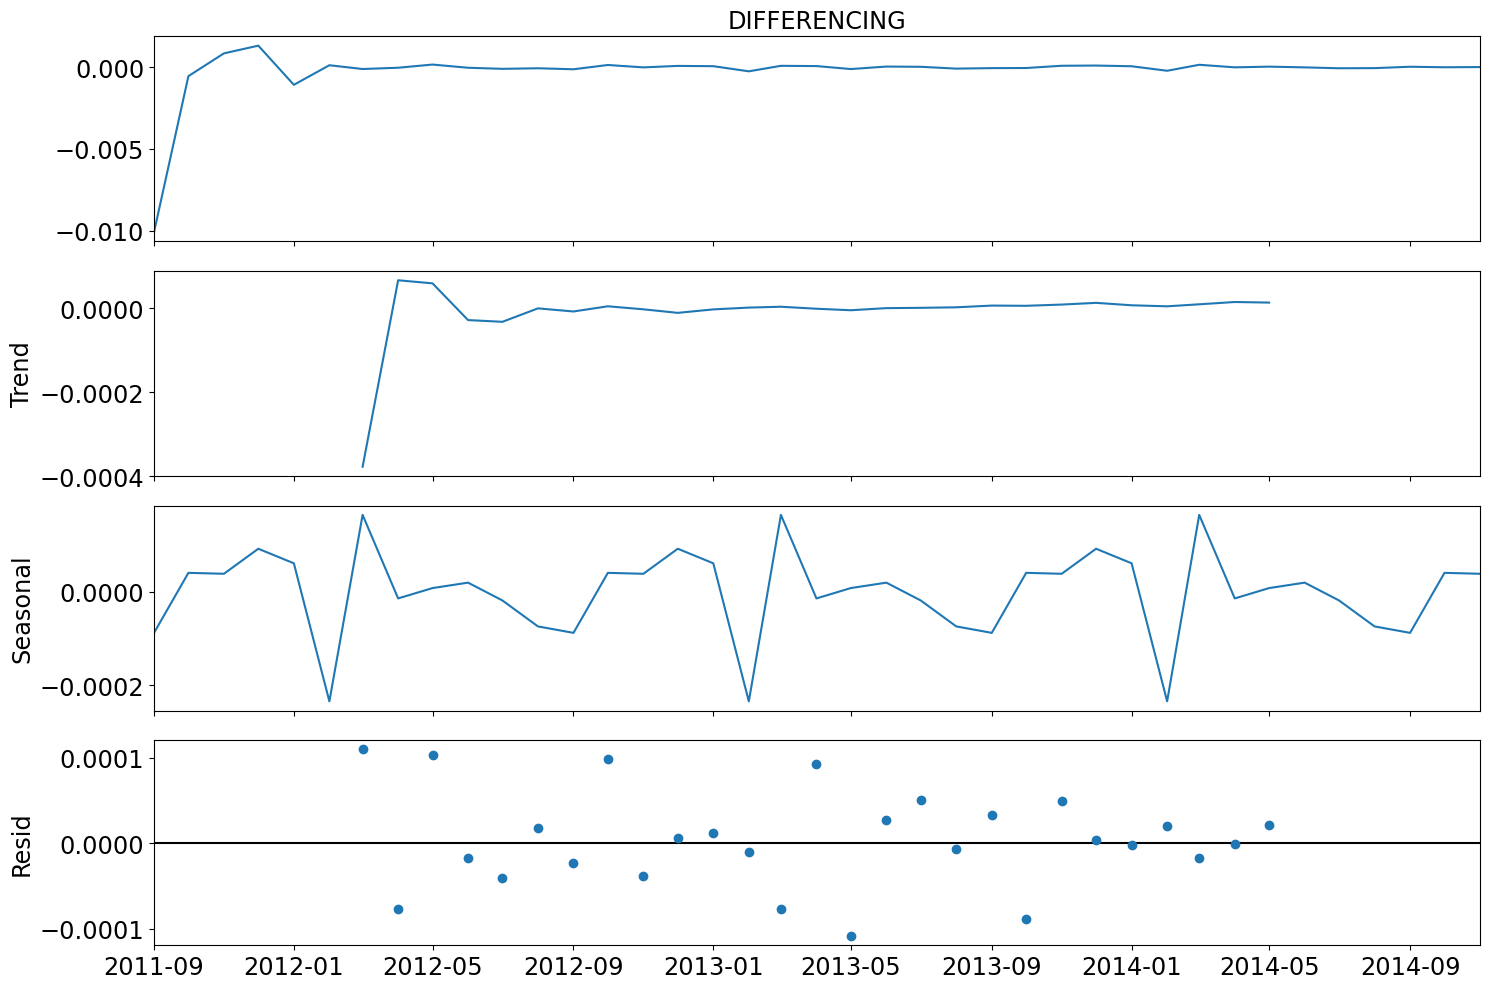

In [31]:
# Check the length of the differenced series
differenced_series = train1.DIFFERENCING.dropna()
print(f"Length of differenced series: {len(differenced_series)}")

# Ensure there are at least 24 observations
if len(differenced_series) >= 24:
    decomp = sm.tsa.seasonal_decompose(differenced_series, period=12)
    decomp.plot()
    plt.show()
else:
    print("Not enough observations for seasonal decomposition. Need at least 24 observations.")


In [32]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(train1.Order_Demand, start_p=1, start_q=1,max_p=3, max_q=3, m=25,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True,)
print(stepwise_model.bic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[25]             : AIC=-117.557, Time=6.14 sec
 ARIMA(0,1,0)(0,1,0)[25]             : AIC=-123.557, Time=0.68 sec
 ARIMA(1,1,0)(1,1,0)[25]             : AIC=-119.639, Time=8.67 sec
 ARIMA(0,1,1)(0,1,1)[25]             : AIC=-119.274, Time=6.48 sec
 ARIMA(0,1,0)(1,1,0)[25]             : AIC=-121.557, Time=2.62 sec
 ARIMA(0,1,0)(0,1,1)[25]             : AIC=-121.557, Time=7.07 sec
 ARIMA(0,1,0)(1,1,1)[25]             : AIC=-119.557, Time=1.40 sec
 ARIMA(1,1,0)(0,1,0)[25]             : AIC=-121.638, Time=0.24 sec
 ARIMA(0,1,1)(0,1,0)[25]             : AIC=-121.274, Time=0.60 sec
 ARIMA(1,1,1)(0,1,0)[25]             : AIC=-119.557, Time=0.47 sec
 ARIMA(0,1,0)(0,1,0)[25] intercept   : AIC=-122.482, Time=0.12 sec

Best model:  ARIMA(0,1,0)(0,1,0)[25]          
Total fit time: 34.540 seconds
-122.91834105799393


In [33]:
# Try log transformation
train['log_demand'] = np.log1p(train['Order_Demand'])

# Try different ARIMA orders
stepwise_model = auto_arima(train['log_demand'], start_p=0, start_q=0,
                            max_p=5, max_q=5, m=12,  # Changed m to 12 for monthly seasonality
                            start_P=0, seasonal=True,
                            d=1, D=1, trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)

# Fit the model with the best parameters
best_order = stepwise_model.order
best_seasonal_order = stepwise_model.seasonal_order

mod = sm.tsa.statespace.SARIMAX(train['log_demand'],
                                order=best_order,
                                seasonal_order=best_seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit(disp=False)
print(results.summary())


Performing stepwise search to minimize aic


<ipython-input-33-ba6dc2ebaa5a>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-283.090, Time=0.34 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-285.089, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-285.666, Time=0.46 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-294.889, Time=0.52 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-296.889, Time=0.30 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-296.627, Time=0.55 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-292.887, Time=0.30 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-277.956, Time=0.34 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=-281.090, Time=0.21 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-285.700, Time=0.16 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=-282.437, Time=0.37 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=-295.429, Time=0.27 sec

Best model:  ARIMA(0,1,1)(0,1,0)[12]          
Total fit time: 3.945 seconds
                                      SARIMAX Results                                      
Dep. Variable:            

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



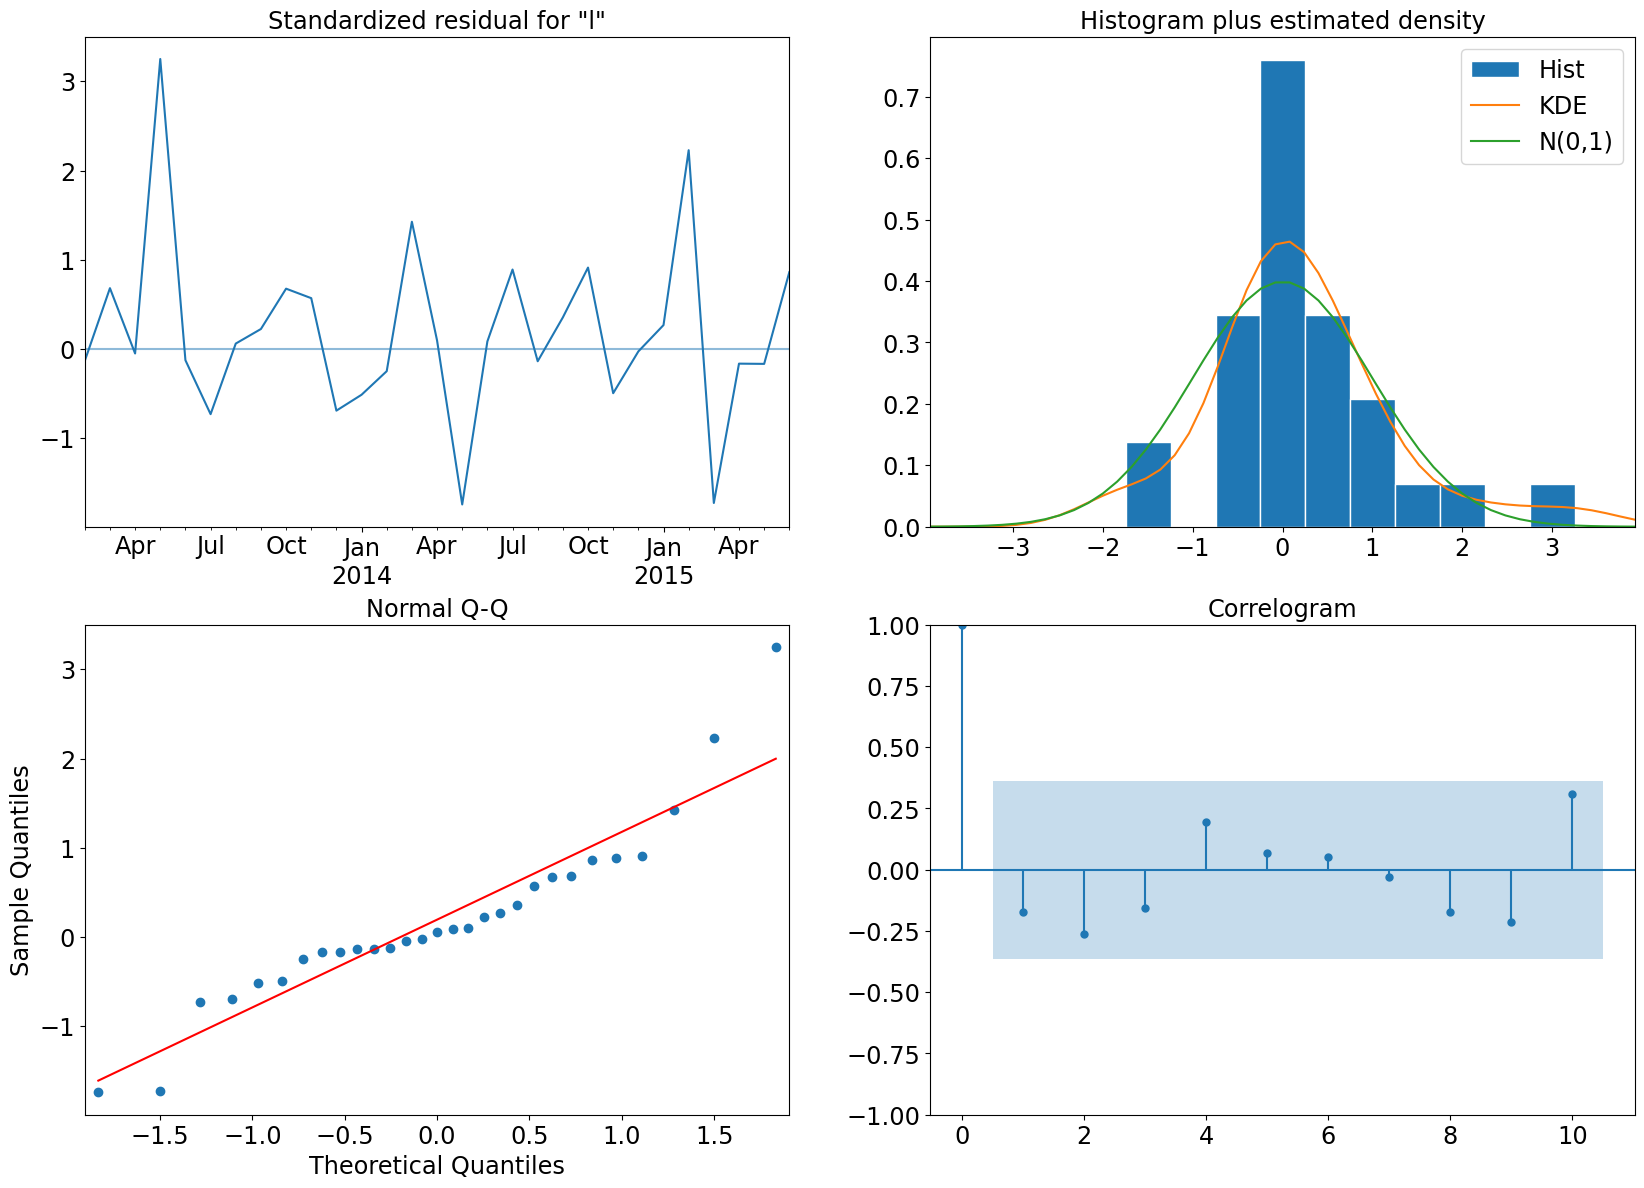

In [34]:
results.plot_diagnostics(figsize=(20, 14))
plt.show()


In [35]:
train1

,Date,Order_Demand,MA_3,MA_3_std,DIFFERENCING
Month,,,,,
2011-06-01,2011-06-01,0.010663,NaN,NaN,NaN
2011-09-01,2011-09-01,0.000570,NaN,NaN,-1.009291e-02
2011-10-01,2011-10-01,0.000031,0.003755,0.005989,-5.389379e-04
2011-11-01,2011-11-01,0.000888,0.000496,0.000433,8.562264e-04
2011-12-01,2011-12-01,0.002215,0.001045,0.001100,1.327860e-03
2012-01-01,2012-01-01,0.001145,0.001416,0.000704,-1.070486e-03
2012-02-01,2012-02-01,0.001274,0.001545,0.000584,1.288138e-04
2012-03-01,2012-03-01,0.001171,0.001197,0.000068,-1.029506e-04
2012-04-01,2012-04-01,0.001147,0.001197,0.000068,-2.415634e-05


In [36]:
pred_1 = results.get_forecast('2017-12')
pred2_ci = pred_1.conf_int()
print(pred_1.predicted_mean['2016-12':'2017-10'])

2016-12-01    0.004421
2017-01-01    0.004770
2017-02-01    0.005509
2017-03-01    0.004110
2017-04-01    0.003266
2017-05-01    0.004596
2017-06-01    0.004893
2017-07-01    0.004798
2017-08-01    0.003989
2017-09-01    0.004367
2017-10-01    0.005043
Freq: MS, Name: predicted_mean, dtype: float64


In [37]:
pred = pred_1.predicted_mean['2016-12':'2017-10']
pred

,predicted_mean
2016-12-01,0.004421
2017-01-01,0.004770
2017-02-01,0.005509
2017-03-01,0.004110
2017-04-01,0.003266
2017-05-01,0.004596
2017-06-01,0.004893
2017-07-01,0.004798
2017-08-01,0.003989
2017-09-01,0.004367


In [38]:
PE_1 = pd.DataFrame(pred,columns=['ORDER_DEMAND_FORECAST'])
PE_1

,ORDER_DEMAND_FORECAST


In [39]:
Given1 = go.Scatter(x=diff_warehouse(Warehouse[1]).index, y=diff_warehouse(Warehouse[1]).Order_Demand, mode = 'lines+markers',name = 'Order_Demand'+ Warehouse[1])
Predicted1=go.Scatter(x=PE_1.index, y=PE_1.ORDER_DEMAND_FORECAST, mode = 'lines+markers',name = 'Predicted_Order_Demand'+ Warehouse[1])
#Actual = go.Scatter(x=WH_A_ALLYEARS_FO.index, y=WH_A_ALLYEARS_FO.Order_Demand, mode = 'lines+markers',name = 'Actual')
Final_Visu1 =[Given1,Predicted1]
plot(Final_Visu1)

'temp-plot.html'

In [40]:
#a=a.drop(columns='MA_3')
#a=a.drop(columns='MA_3_std')
#a = a.drop(columns='DIFFERENCING')
#a = a.drop(columns='Warehouse')
a


,Order_Demand,MA_3,MA_3_std,DIFFERENCING
Date,,,,
2011-06-01,0.010663,NaN,NaN,NaN
2011-09-01,0.000570,NaN,NaN,-0.010093
2011-10-01,0.000031,0.003755,0.005989,-0.000539
2011-11-01,0.000888,0.000496,0.000433,0.000856
2011-12-01,0.002215,0.001045,0.001100,0.001328
...,...,...,...,...
2016-09-01,0.001250,0.001329,0.000075,-0.000087
2016-10-01,0.001355,0.001314,0.000056,0.000105
2016-11-01,0.001393,0.001333,0.000074,0.000038


# Final forecast visualization code

In [41]:
# Get the data for Warehouse[3]
warehouse_data = diff_warehouse(Warehouse[3])

# Split the data into train and test sets
train = warehouse_data.iloc[:int(len(warehouse_data)*0.7)]
test = warehouse_data.iloc[int(len(warehouse_data)*0.7):]

print('\n\n\n\n' + '_'*120)
print(color.BOLD + f"\n\n\t\t\t\t\t\t\t {Warehouse[3]} \n" + color.END)

print("Shape of train data:", train.shape)

# Reduce max_p and max_q, change m to 12 for monthly data
stepwise_model = auto_arima(train.Order_Demand, start_p=1, start_q=1, max_p=2, max_q=2, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True)

order_in = stepwise_model.order
seasonal_order_in = stepwise_model.seasonal_order
print('Least AIC:', stepwise_model.aic())
print('Least BIC:', stepwise_model.bic())

mod = sm.tsa.statespace.SARIMAX(train.Order_Demand, trend='n', order=order_in, seasonal_order=seasonal_order_in, enforce_invertibility=False)
results = mod.fit()
print('\n\n\n', results.summary())

print("Shape of fitted data:", results.model.endog.shape)

print('\n\n\n\t\t\t\t\t\t Forecasting using trained model - 70% Data ')
prediction_1 = results.get_forecast(steps=len(test))
prediction_1_ci = prediction_1.conf_int()
pred = prediction_1.predicted_mean

print('\n\n\n\t\t\t\t\t\t Dataframe of Forecasting ')
Prediction_df = pd.DataFrame(pred, columns=['ORDER_DEMAND_FORECAST'])
print(Prediction_df)

Given = go.Scatter(x=warehouse_data.index, y=warehouse_data.Order_Demand, mode='lines+markers', name=f'Order_Demand {Warehouse[3]}')
Predicted = go.Scatter(x=Prediction_df.index, y=Prediction_df.ORDER_DEMAND_FORECAST, mode='lines+markers', name=f'Predicted_Order_Demand {Warehouse[3]}')
Final_Visu = [Given, Predicted]

layout = go.Layout(
    title=f'Forecasted Order Demand for {Warehouse[3]}',
    xaxis=dict(
        title='Years',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Order Demand',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

Visu = go.Figure(data=Final_Visu, layout=layout)
plot(Visu, filename=f'forecast_{Warehouse[3]}.html')





________________________________________________________________________________________________________________________


							 Whse_C 

Shape of train data: (44, 3)
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-275.659, Time=2.34 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-284.783, Time=0.19 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-285.341, Time=2.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-294.546, Time=0.65 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-296.545, Time=0.22 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-296.277, Time=0.42 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-292.546, Time=0.90 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=-277.659, Time=0.34 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=-280.784, Time=0.57 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-285.383, Time=0.17 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=-285.406, Time=0.86 sec
 ARIMA(0,1,1)(0,1,0)[12] intercept   : AIC=-295

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.






                                       SARIMAX Results                                      
Dep. Variable:                        Order_Demand   No. Observations:                   44
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                 150.467
Date:                             Sat, 07 Sep 2024   AIC                           -296.935
Time:                                     15:33:27   BIC                           -294.067
Sample:                                 11-01-2011   HQIC                          -296.000
                                      - 06-01-2015                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8301      0.274     -3.031      0.002      -1.367      -0.293
sigma2       3.42e-06  

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



'forecast_Whse_C.html'

In [42]:
#diff_warehouse(Warehouse[3])=diff_warehouse(Warehouse[3]).drop(columns=['MA_3', 'MA_3_std'])
xyz=diff_warehouse(Warehouse[3])
xyz = xyz.drop(columns=['MA_3', 'MA_3_std'])
xyz

,Order_Demand
Date,
2011-11-01,0.010740
2011-12-01,0.001567
2012-01-01,0.002582
2012-02-01,0.003512
2012-03-01,0.003321
...,...
2016-09-01,0.003698
2016-10-01,0.004175
2016-11-01,0.003264


# Another style of visualization including the band of forecast

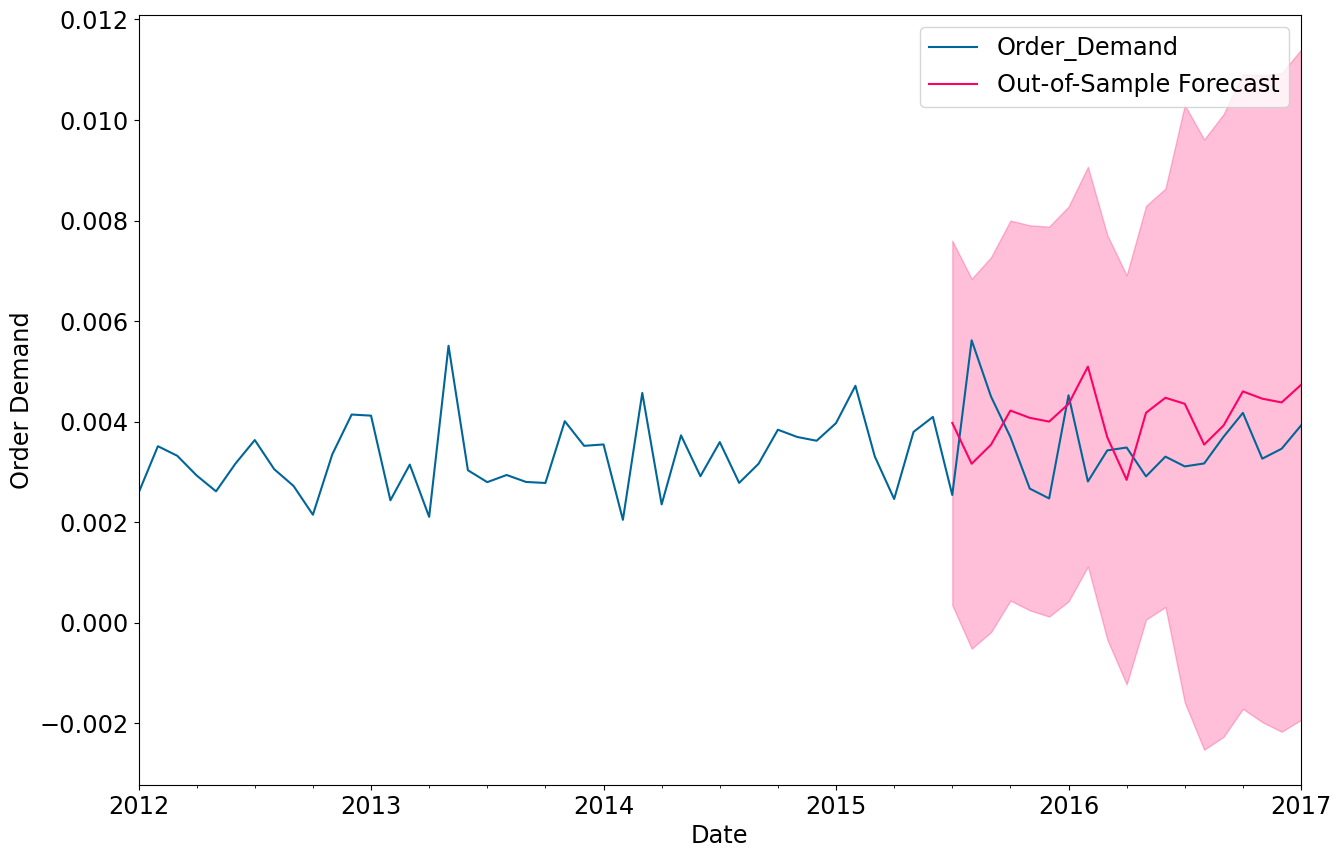

In [43]:
ax = xyz['2012':].plot(label='Observed', color='#006699')
prediction_1.predicted_mean.plot(ax=ax, label='Out-of-Sample Forecast', color='#ff0066')
ax.fill_between(prediction_1_ci.index,
                prediction_1_ci.iloc[:, 0],
                prediction_1_ci.iloc[:, 1], color='#ff0066', alpha=.25)

# Check if PE_1 is not empty before using its index
if not PE_1.empty:
    ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-12'), PE_1.index[-1], alpha=.15, zorder=-1, color='grey')
else:
    print("Warning: PE_1 is empty, skipping fill_betweenx")

ax.set_xlabel('Date')
ax.set_ylabel('Order Demand')
plt.legend()
plt.show()